***Adrián Yared Armas de la Nuez***

**Problema de clasificación:**

*Original:*
https://www.drivendata.org/competitions/57/nepal-earthquake/


*Dataset zip link:*

*drive:*
https://drive.google.com/file/d/17d3uTOVUte5oeV3x41bQIfKnqtOqrZzG/view?usp=sharing

*git:*
https://github.com/AdrianYArmas/IaBigData/blob/main/SNS/3%20%20-%20Algoritmos%20y%20herramientas%20para%20el%20aprendizaje%20supervisado%20/3.7%20%20Predicci%C3%B3n%20de%20Riesgo%20de%20derrumbamiento_Terremotos/dataset/Earthquake_dataset.zip

# Imports

In [1]:
!pip install lazypredict

In [2]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import ParameterSampler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
import lazypredict
from lazypredict.Supervised import LazyClassifier
import pickle
from sklearn.metrics import classification_report
# Importación de bibliotecas específicas para selección de características
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm  # Para barras de progreso en notebook
# Si estás usando script y no notebook, usa:
# from tqdm import tqdm
import warnings

# Final code explained

## Datset

In [3]:
warnings.filterwarnings('ignore')

# Configuración visual
plt.style.use('fivethirtyeight')
sns.set_palette("Set2")

### Download from github

In [4]:
# Download dataset from github
# URLs de los datasets en GitHub
train_values_url = "https://raw.githubusercontent.com/AdrianYArmas/IaBigData/refs/heads/main/SNS/3%20%20-%20Algoritmos%20y%20herramientas%20para%20el%20aprendizaje%20supervisado%20/3.7%20%20Predicci%C3%B3n%20de%20Riesgo%20de%20derrumbamiento_Terremotos/dataset/train_values.csv"
train_labels_url = "https://raw.githubusercontent.com/AdrianYArmas/IaBigData/refs/heads/main/SNS/3%20%20-%20Algoritmos%20y%20herramientas%20para%20el%20aprendizaje%20supervisado%20/3.7%20%20Predicci%C3%B3n%20de%20Riesgo%20de%20derrumbamiento_Terremotos/dataset/train_labels.csv"
test_values_url  = "https://raw.githubusercontent.com/AdrianYArmas/IaBigData/refs/heads/main/SNS/3%20%20-%20Algoritmos%20y%20herramientas%20para%20el%20aprendizaje%20supervisado%20/3.7%20%20Predicci%C3%B3n%20de%20Riesgo%20de%20derrumbamiento_Terremotos/dataset/test_values.csv"

### Dataset Load

In [5]:
# Cargar los datasets
train_values = pd.read_csv(train_values_url)
train_labels = pd.read_csv(train_labels_url)
test_values  = pd.read_csv(test_values_url)
print("Dimensiones del conjunto de datos de entrenamiento (features):", train_values.shape)
print("Dimensiones del conjunto de datos de entrenamiento (labels):", train_labels.shape)
print("Dimensiones del conjunto de datos de prueba:", test_values.shape)

# Verificar los primeros registros
train_values.head()

Dimensiones del conjunto de datos de entrenamiento (features): (260601, 39)
Dimensiones del conjunto de datos de entrenamiento (labels): (260601, 2)
Dimensiones del conjunto de datos de prueba: (86868, 39)


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


### Análisi de datos

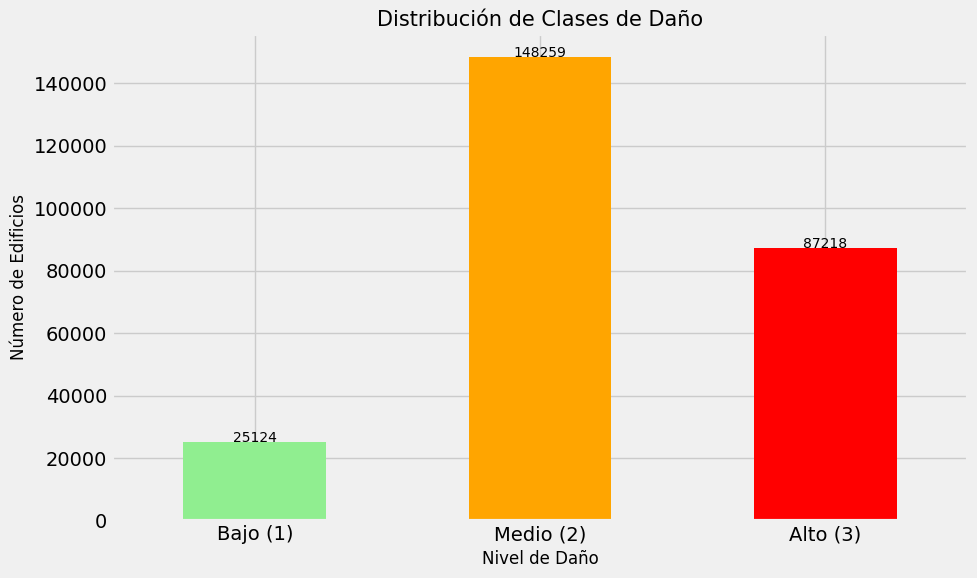

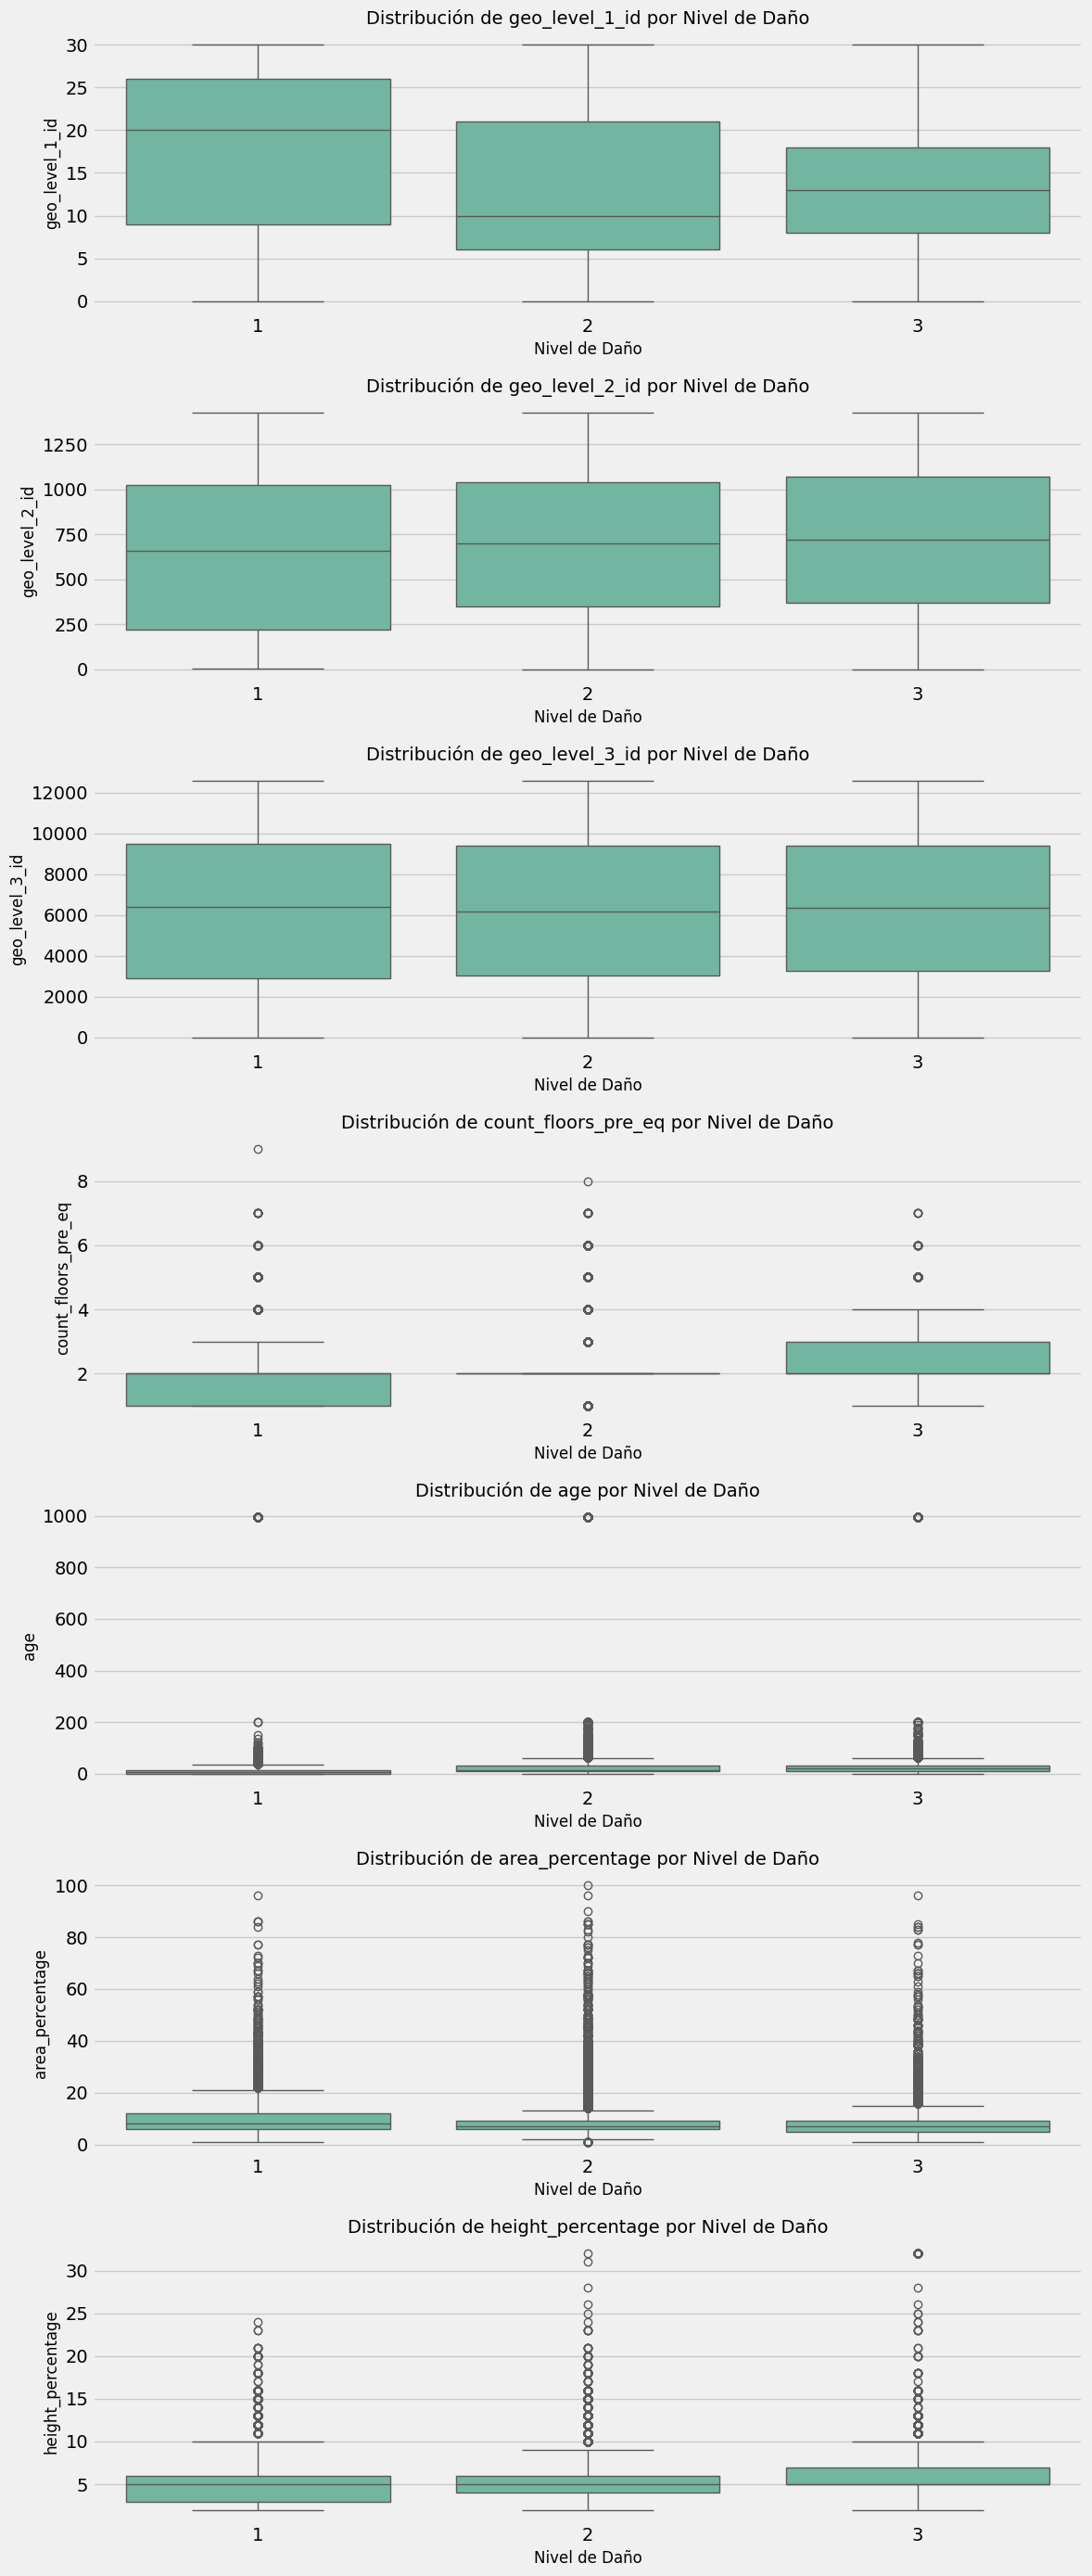

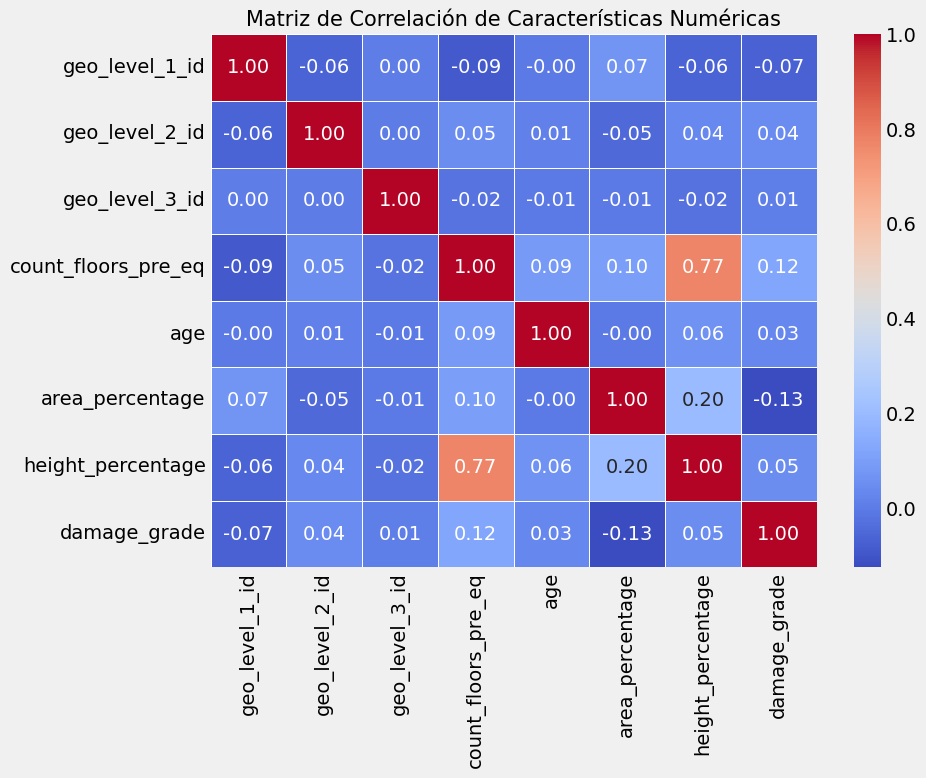

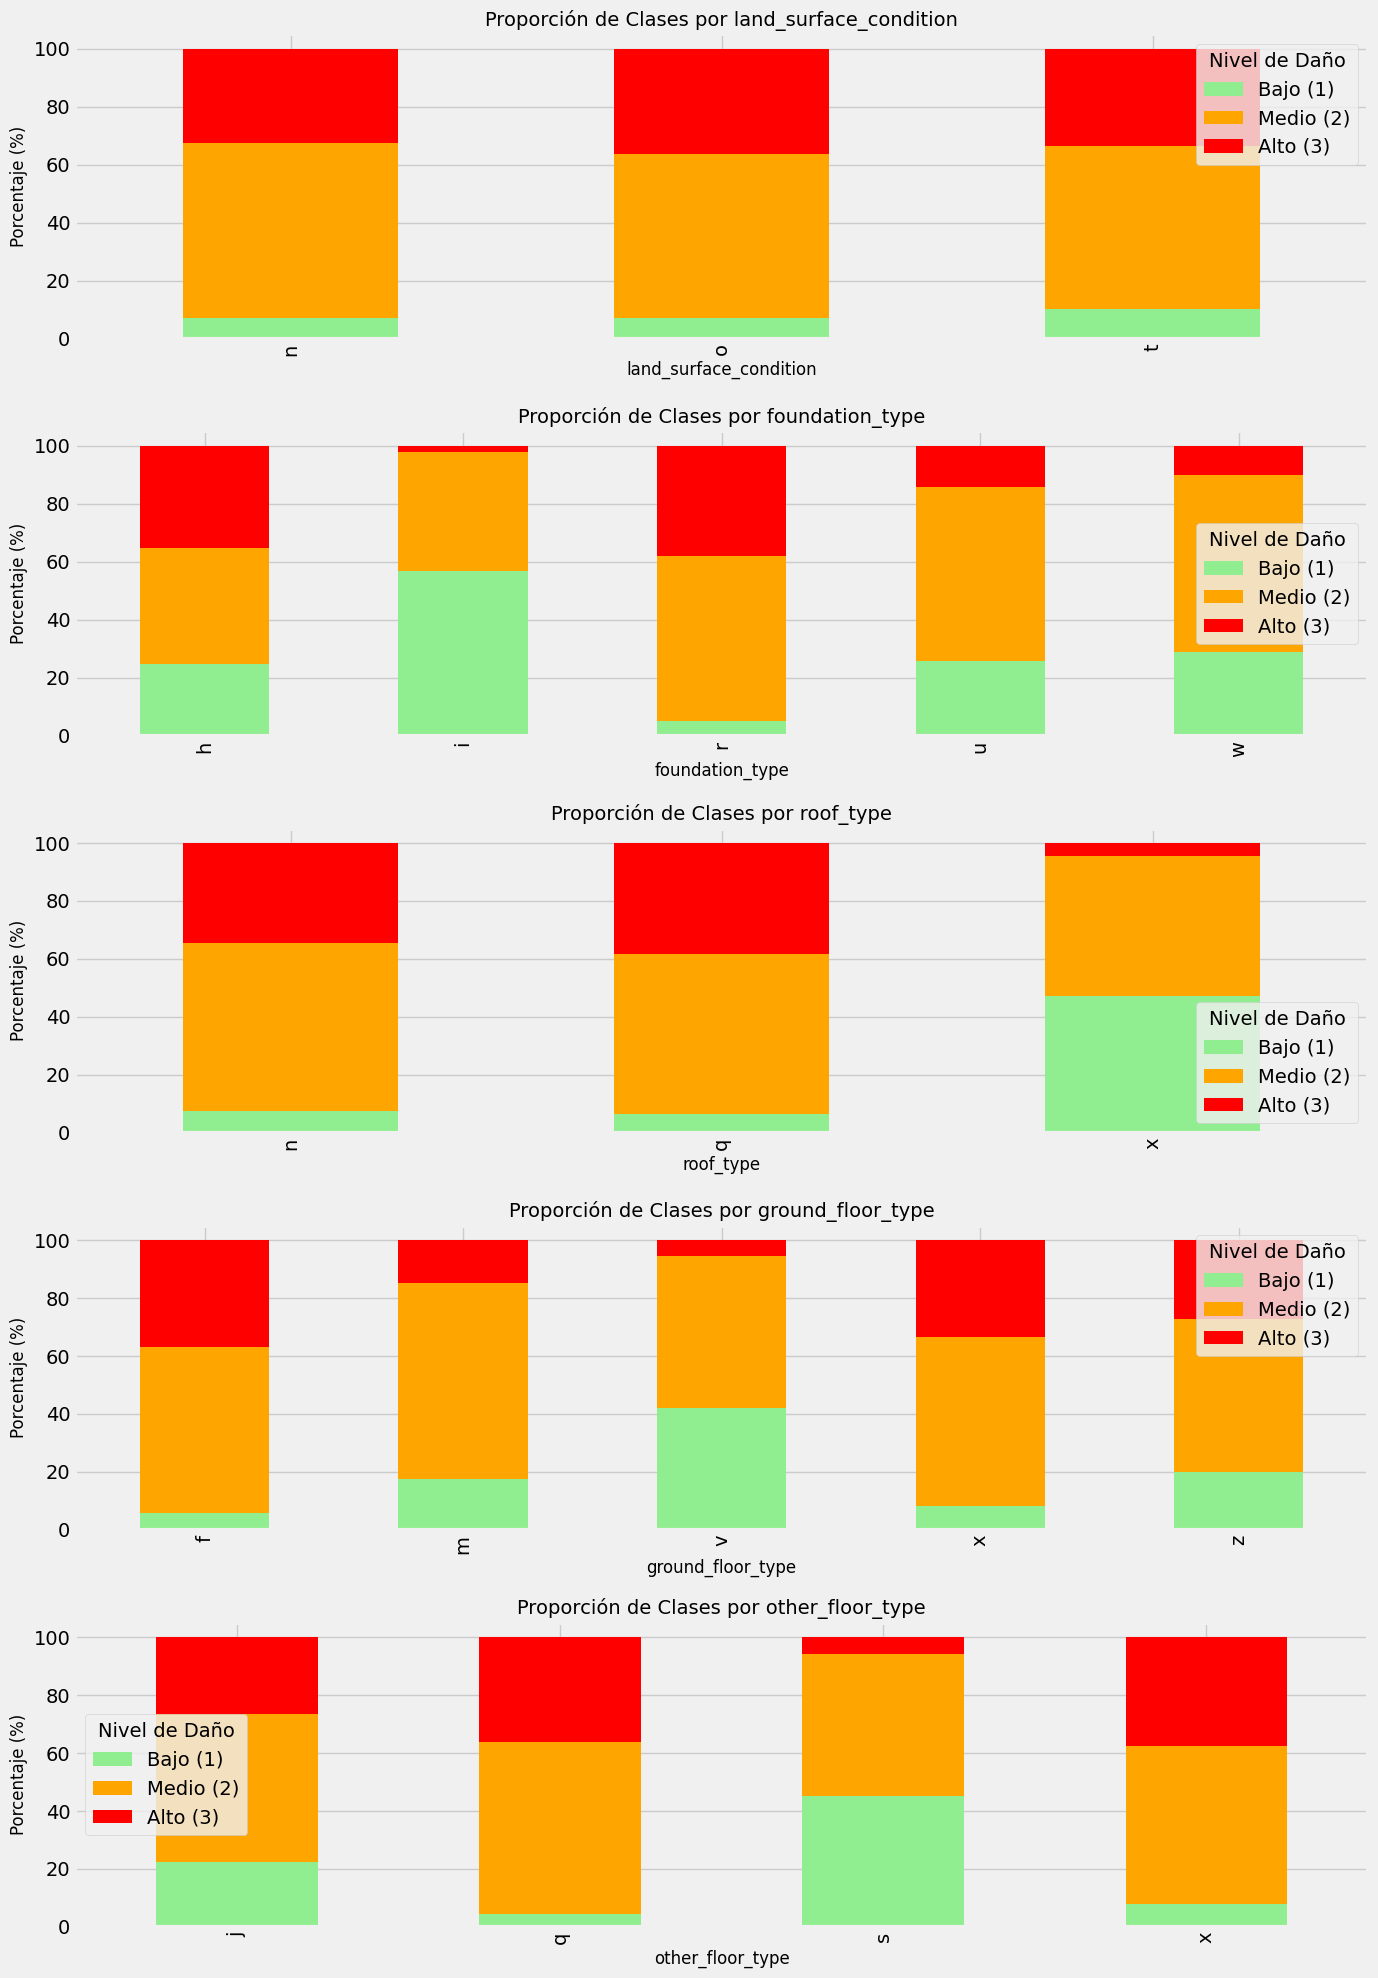

Se identificaron 22 columnas binarias


,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage
count,260601.00,260601.00,260601.00,260601.00,260601.00,260601.00,260601.00
mean,13.90,701.07,6257.88,2.13,26.54,8.02,5.43
std,8.03,412.71,3646.37,0.73,73.57,4.39,1.92
min,0.00,0.00,0.00,1.00,0.00,1.00,2.00
25%,7.00,350.00,3073.00,2.00,10.00,5.00,4.00
50%,12.00,702.00,6270.00,2.00,15.00,7.00,5.00
75%,21.00,1050.00,9412.00,2.00,30.00,9.00,6.00
max,30.00,1427.00,12567.00,9.00,995.00,100.00,32.00


In [6]:
# Fusionar datos de entrenamiento y etiquetas para el análisis
train_data = pd.merge(train_values, train_labels, on="building_id")

# Explorar distribución de la variable objetivo
plt.figure(figsize=(10, 6))
damage_counts = train_data['damage_grade'].value_counts().sort_index()
ax = damage_counts.plot(kind='bar', color=['lightgreen', 'orange', 'red'])
plt.title('Distribución de Clases de Daño', fontsize=15)
plt.xlabel('Nivel de Daño', fontsize=12)
plt.ylabel('Número de Edificios', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Bajo (1)', 'Medio (2)', 'Alto (3)'], rotation=0)

# Agregar valores sobre las barras
for i, v in enumerate(damage_counts):
    ax.text(i, v + 50, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Explorar características numéricas
numerical_features = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq',
                      'age', 'area_percentage', 'height_percentage']

fig, axes = plt.subplots(len(numerical_features), 1, figsize=(12, 4*len(numerical_features)))
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='damage_grade', y=feature, data=train_data, ax=axes[i])
    axes[i].set_title(f'Distribución de {feature} por Nivel de Daño', fontsize=14)
    axes[i].set_xlabel('Nivel de Daño', fontsize=12)
    axes[i].set_ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

# Matriz de correlación de características numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = train_data[numerical_features + ['damage_grade']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Características Numéricas', fontsize=15)
plt.tight_layout()
plt.show()

# Análisis de características categóricas
categorical_features = ['land_surface_condition', 'foundation_type', 'roof_type',
                       'ground_floor_type', 'other_floor_type']

fig, axes = plt.subplots(len(categorical_features), 1, figsize=(14, 4*len(categorical_features)))
for i, feature in enumerate(categorical_features):
    # Calcular proporción de cada categoría para cada clase de daño
    cat_proportions = pd.crosstab(train_data[feature], train_data['damage_grade'],
                                   normalize='index') * 100
    cat_proportions.plot(kind='bar', stacked=True, ax=axes[i],
                          color=['lightgreen', 'orange', 'red'])
    axes[i].set_title(f'Proporción de Clases por {feature}', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Porcentaje (%)', fontsize=12)
    axes[i].legend(title='Nivel de Daño', labels=['Bajo (1)', 'Medio (2)', 'Alto (3)'])

plt.tight_layout()
plt.show()

# Identificar columnas binarias (codificadas como 0-1)
binary_columns = []
for col in train_values.columns:
    unique_vals = train_values[col].unique()
    if len(unique_vals) == 2 and set(unique_vals).issubset({0, 1}):
        binary_columns.append(col)

print(f"Se identificaron {len(binary_columns)} columnas binarias")

# Resumen estadístico de características numéricas importantes
train_data[numerical_features].describe()

## Seleccción con dendograma

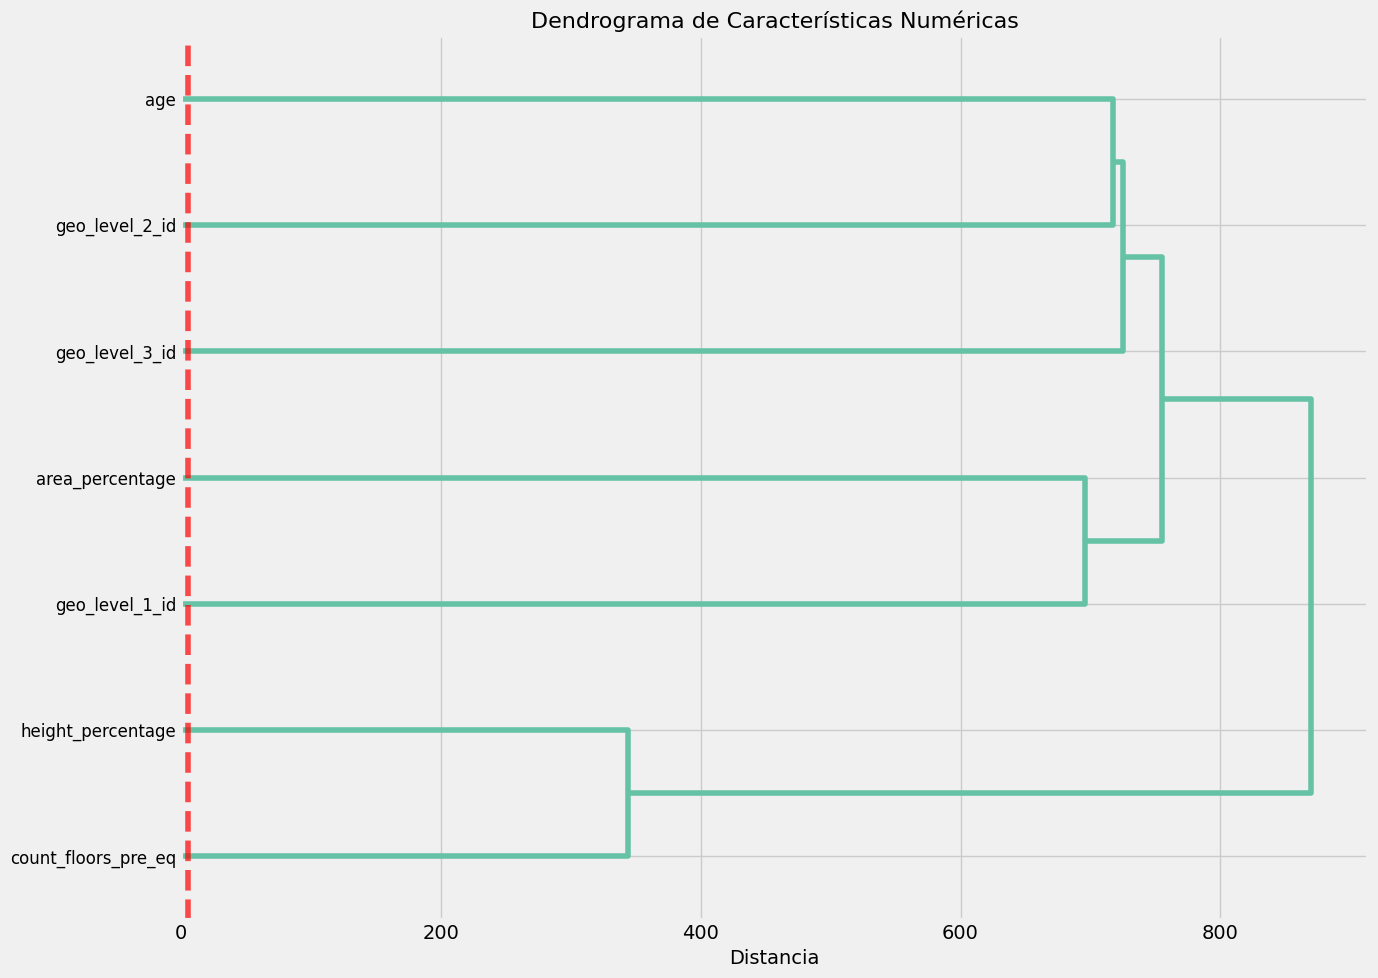

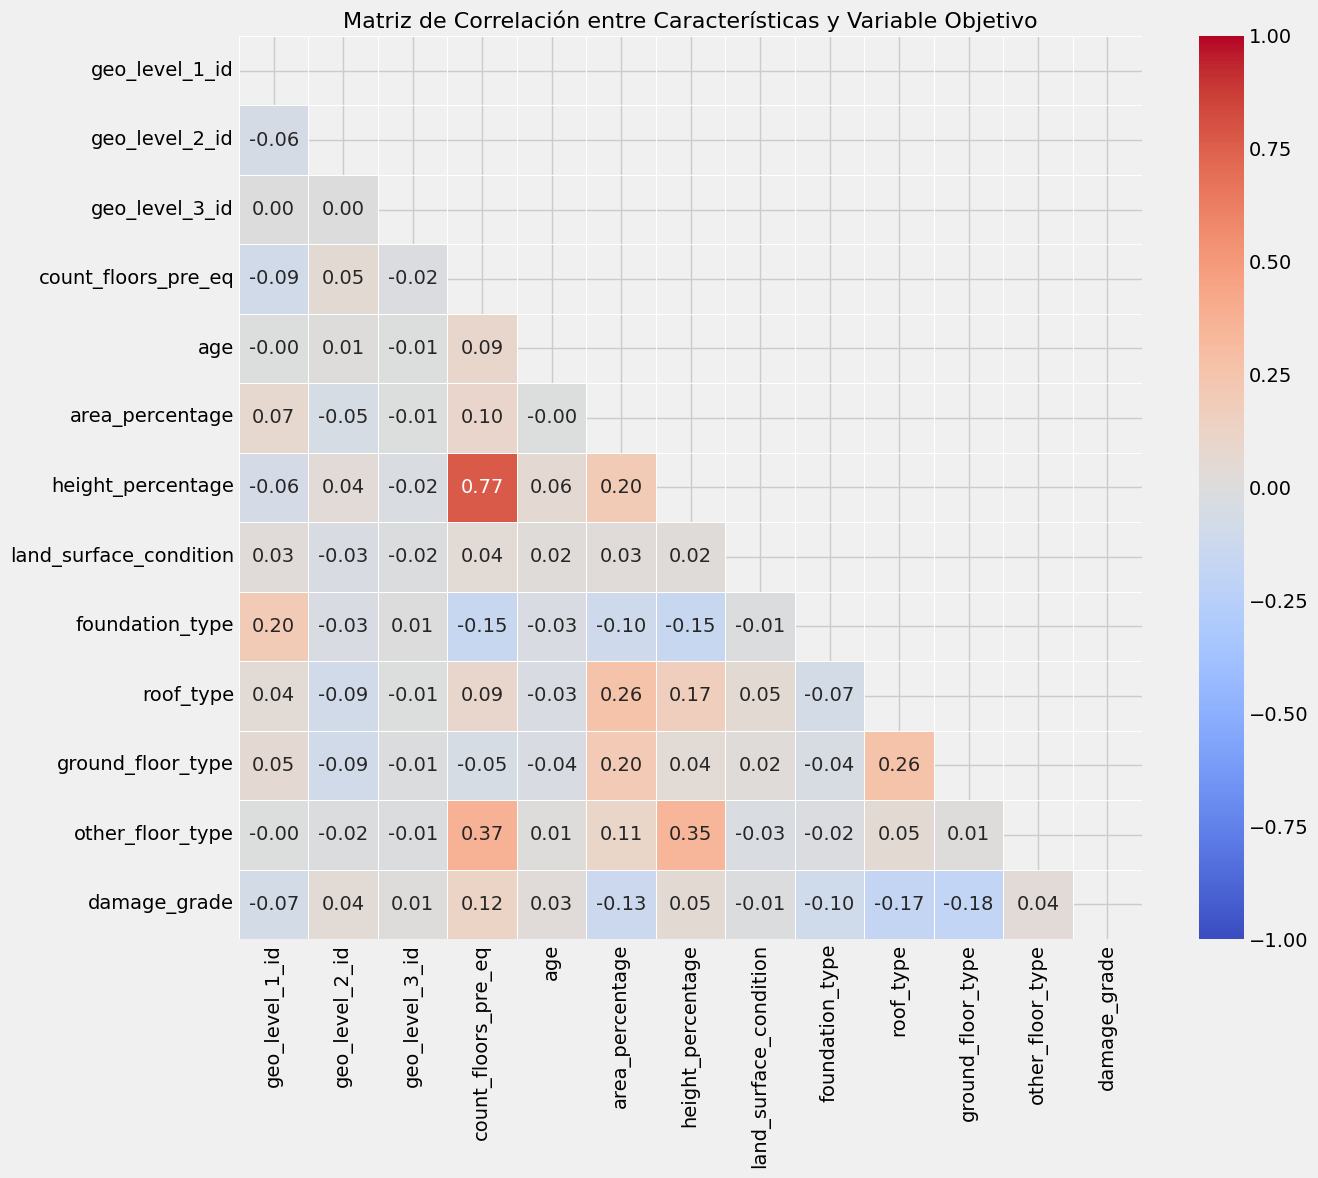

Características seleccionadas para modelado: ['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered']


In [7]:
# Preparación de datos para dendrograma
# Seleccionamos características numéricas
X_numerical = train_data[numerical_features].copy()

# Escalamos los datos para el dendrograma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Creamos el dendrograma
plt.figure(figsize=(14, 10))
dend = hierarchy.dendrogram(
    hierarchy.linkage(X_scaled.T, method='ward'),  # Transpuesta para clustering de características
    labels=X_numerical.columns,
    orientation='right',
    leaf_font_size=12,
    color_threshold=5
)
plt.title('Dendrograma de Características Numéricas', fontsize=16)
plt.xlabel('Distancia', fontsize=14)
plt.axvline(x=5, color='red', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Análisis de correlación entre características categóricas y numéricas
# Para esto, convertiremos las categóricas a numéricas temporalmente

# Función para convertir características categóricas a numéricas
def convert_categorical_to_numeric(df, categorical_cols):
    df_encoded = df.copy()
    for col in categorical_cols:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes
    return df_encoded

categorical_cols = [col for col in train_data.columns
                   if train_data[col].dtype == 'object' and col not in ['building_id']]

train_data_encoded = convert_categorical_to_numeric(train_data, categorical_cols)

# Seleccionamos un subset de columnas para el heatmap (para evitar sobrecarga visual)
selected_features = numerical_features + categorical_cols[:5]  # Primeras 5 categóricas
selected_features.append('damage_grade')  # Añadir variable objetivo

plt.figure(figsize=(14, 12))
correlation = train_data_encoded[selected_features].corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Características y Variable Objetivo', fontsize=16)
plt.tight_layout()
plt.show()

# Basado en el dendrograma y la correlación, seleccionamos las características relevantes
selected_features = [
    'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
    'land_surface_condition', 'foundation_type', 'roof_type',
    'ground_floor_type', 'other_floor_type'
]

# Podemos añadir algunas características adicionales basadas en el dominio
selected_features += [col for col in binary_columns[:10]]  # Añadir primeras 10 columnas binarias

print("Características seleccionadas para modelado:", selected_features)

## Sin dendograma

===== SELECCIÓN DE CARACTERÍSTICAS ADICIONAL =====

--- Selección basada en prueba F (ANOVA) ---
Top 20 características según prueba F:


,Característica,Puntuación F,P-valor
38,damage_grade,inf,0.00
15,has_superstructure_mud_mortar_stone,16490.39,0.00
19,has_superstructure_cement_mortar_brick,11120.19,0.00
23,has_superstructure_rc_engineered,7757.59,0.00
9,roof_type,6944.70,0.00
10,ground_floor_type,5750.58,0.00
22,has_superstructure_rc_non_engineered,4721.92,0.00
0,geo_level_1_id,2657.79,0.00
3,count_floors_pre_eq,2544.84,0.00
5,area_percentage,2529.05,0.00


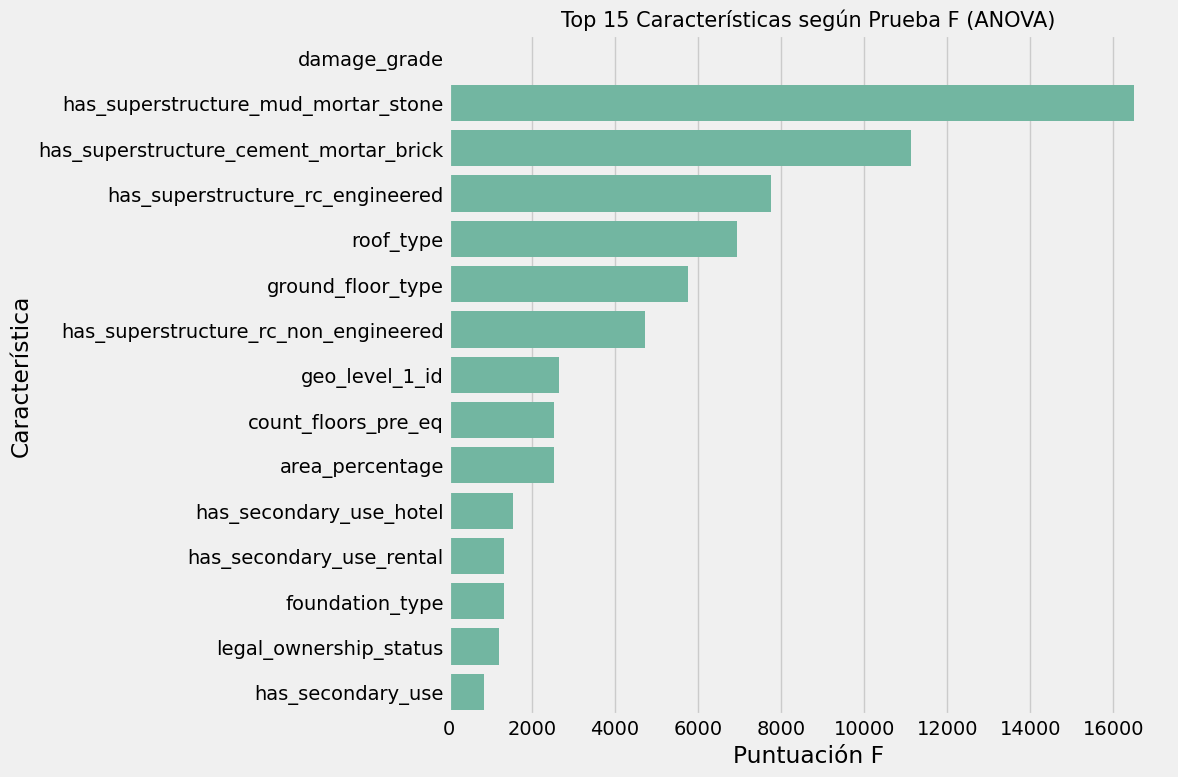


--- Selección basada en Información Mutua ---
Top 20 características según Información Mutua:


,Característica,Información Mutua
38,damage_grade,0.94
2,geo_level_3_id,0.30
1,geo_level_2_id,0.23
0,geo_level_1_id,0.13
8,foundation_type,0.09
15,has_superstructure_mud_mortar_stone,0.08
11,other_floor_type,0.06
10,ground_floor_type,0.06
9,roof_type,0.04
3,count_floors_pre_eq,0.03


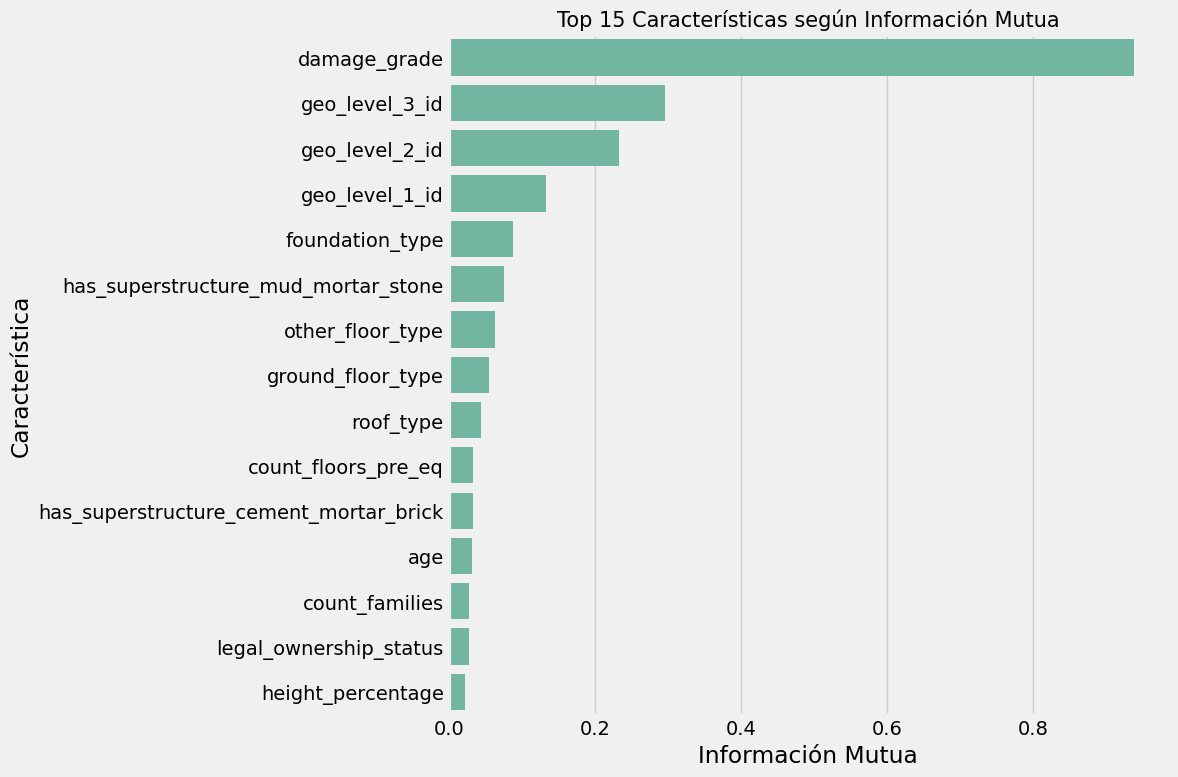


--- Selección basada en Importancia de Características (RandomForest) ---
Top 20 características según RandomForest:


,Característica,Importancia
38,damage_grade,0.88
0,geo_level_1_id,0.02
8,foundation_type,0.01
15,has_superstructure_mud_mortar_stone,0.01
9,roof_type,0.01
1,geo_level_2_id,0.01
4,age,0.01
10,ground_floor_type,0.01
2,geo_level_3_id,0.01
19,has_superstructure_cement_mortar_brick,0.01


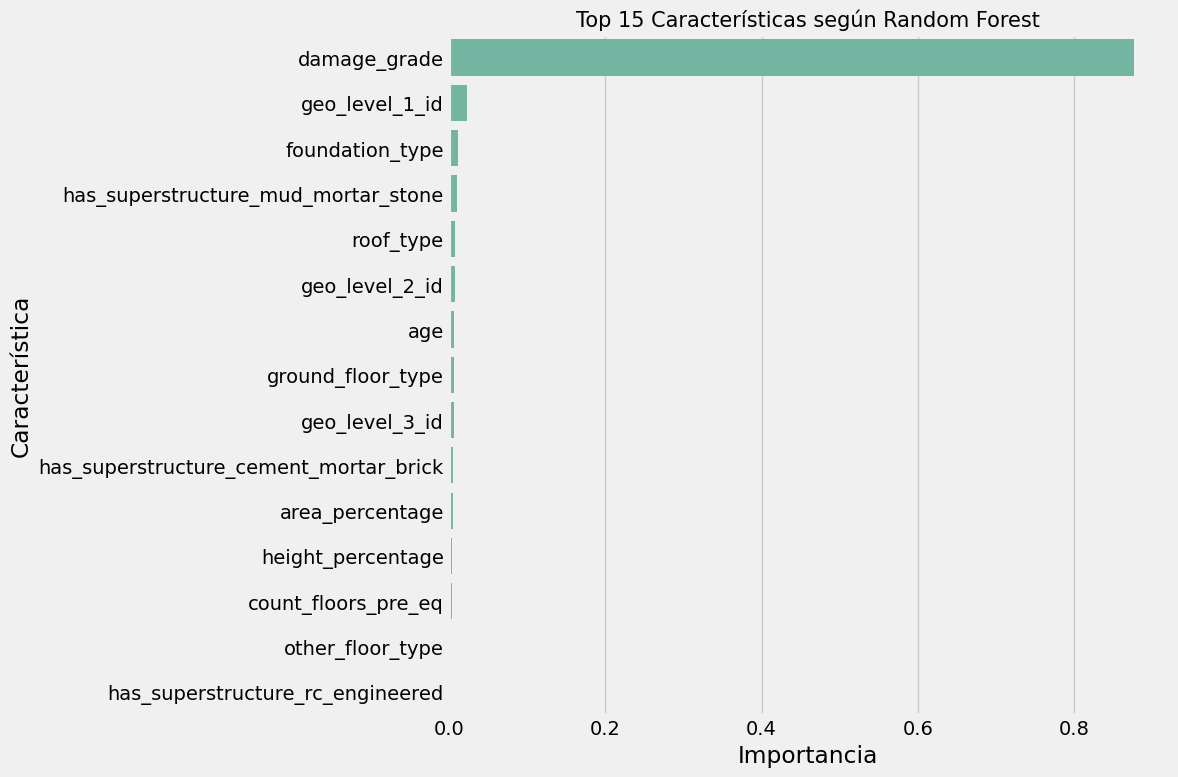


Características seleccionadas automáticamente por RandomForest (threshold='mean'): 1
['damage_grade']

--- Análisis de Componentes Principales ---
Número de componentes necesarios para explicar 95% de la varianza: 34


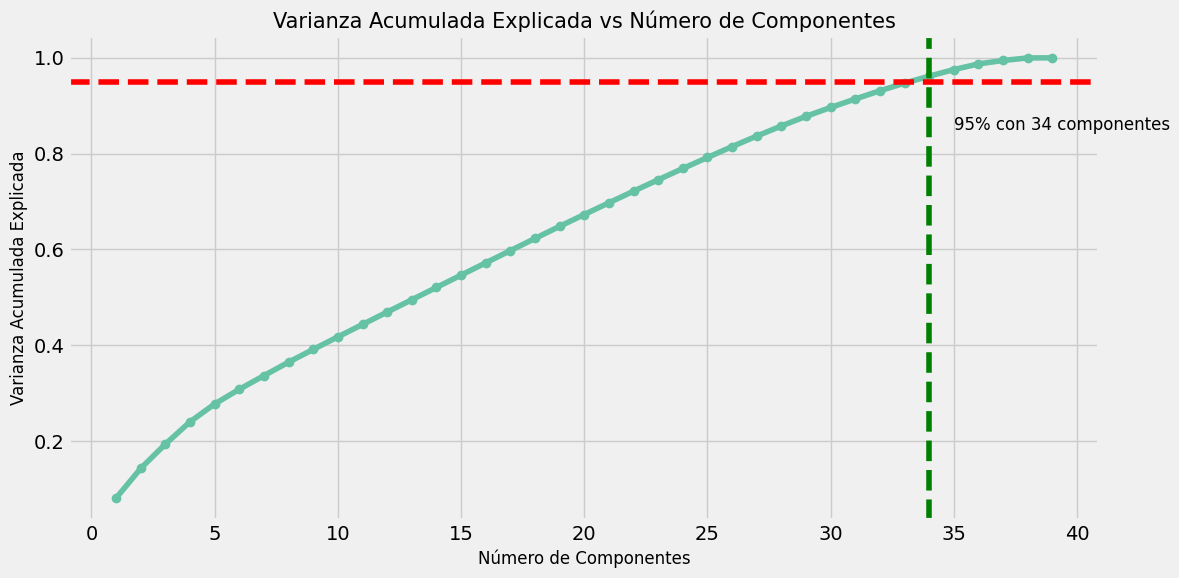


--- Características comunes entre métodos de selección ---
Características comunes en ANOVA y MI: 11
Características comunes en ANOVA y RF: 13
Características comunes en MI y RF: 17
Características comunes en los tres métodos: 10
Características comunes en los tres métodos:
['area_percentage', 'count_floors_pre_eq', 'damage_grade', 'foundation_type', 'geo_level_1_id', 'ground_floor_type', 'has_superstructure_cement_mortar_brick', 'has_superstructure_mud_mortar_stone', 'has_superstructure_rc_engineered', 'roof_type']

--- Selección final de características ---
Total de características seleccionadas: 21
Lista final de características seleccionadas:
['age', 'area_percentage', 'count_families', 'count_floors_pre_eq', 'damage_grade', 'foundation_type', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'ground_floor_type', 'has_superstructure_adobe_mud', 'has_superstructure_cement_mortar_brick', 'has_superstructure_mud_mortar_brick', 'has_superstructure_mud_mortar_stone', 'has_superstru

In [8]:

print("===== SELECCIÓN DE CARACTERÍSTICAS ADICIONAL =====")

# 1. Preparación de datos para selección de características
# Convertimos características categóricas a numéricas para análisis estadísticos
X_encoded = convert_categorical_to_numeric(train_data, categorical_cols)
X_encoded = X_encoded.drop(['building_id'], axis=1)
y = train_data['damage_grade']

# 2. Método 1: Análisis univariante usando prueba F (ANOVA F-test)
print("\n--- Selección basada en prueba F (ANOVA) ---")
k_best_features = 20  # Seleccionamos top 20 características
selector_f = SelectKBest(f_classif, k=k_best_features)
X_kbest = selector_f.fit_transform(X_encoded, y)

# Obtener puntuaciones y nombres de las características seleccionadas
feature_scores = pd.DataFrame({
    'Característica': X_encoded.columns,
    'Puntuación F': selector_f.scores_,
    'P-valor': selector_f.pvalues_
})

# Ordenar por puntuación descendente y mostrar top 20
top_features_f = feature_scores.sort_values('Puntuación F', ascending=False).head(20)
print("Top 20 características según prueba F:")
display(top_features_f)

# Visualización de las principales características según ANOVA
plt.figure(figsize=(12, 8))
sns.barplot(x='Puntuación F', y='Característica', data=top_features_f.head(15))
plt.title('Top 15 Características según Prueba F (ANOVA)', fontsize=15)
plt.tight_layout()
plt.show()

# 3. Método 2: Información Mutua (captura relaciones no lineales)
print("\n--- Selección basada en Información Mutua ---")
selector_mi = SelectKBest(mutual_info_classif, k=k_best_features)
X_mi = selector_mi.fit_transform(X_encoded, y)

# Obtener puntuaciones
feature_scores_mi = pd.DataFrame({
    'Característica': X_encoded.columns,
    'Información Mutua': selector_mi.scores_
})

# Ordenar por puntuación descendente y mostrar top 20
top_features_mi = feature_scores_mi.sort_values('Información Mutua', ascending=False).head(20)
print("Top 20 características según Información Mutua:")
display(top_features_mi)

# Visualización de las principales características según Información Mutua
plt.figure(figsize=(12, 8))
sns.barplot(x='Información Mutua', y='Característica', data=top_features_mi.head(15))
plt.title('Top 15 Características según Información Mutua', fontsize=15)
plt.tight_layout()
plt.show()

# 4. Método 3: Importancia de características con RandomForest
print("\n--- Selección basada en Importancia de Características (RandomForest) ---")
feature_selector_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
feature_selector_rf.fit(X_encoded, y)

# Obtener importancias
feature_importances = pd.DataFrame({
    'Característica': X_encoded.columns,
    'Importancia': feature_selector_rf.feature_importances_
})

# Ordenar por importancia descendente y mostrar top 20
top_features_rf = feature_importances.sort_values('Importancia', ascending=False).head(20)
print("Top 20 características según RandomForest:")
display(top_features_rf)

# Visualización de las principales características según RandomForest
plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Característica', data=top_features_rf.head(15))
plt.title('Top 15 Características según Random Forest', fontsize=15)
plt.tight_layout()
plt.show()

# 5. Selección automática de características basada en umbral de importancia
selector_model = SelectFromModel(feature_selector_rf, threshold='mean')
X_important = selector_model.fit_transform(X_encoded, y)
selected_features_mask = selector_model.get_support()
selected_features = X_encoded.columns[selected_features_mask]

print(f"\nCaracterísticas seleccionadas automáticamente por RandomForest (threshold='mean'): {len(selected_features)}")
print(sorted(selected_features))

# 6. Análisis de Componentes Principales (PCA)
print("\n--- Análisis de Componentes Principales ---")
pca = PCA()
X_pca = pca.fit_transform(StandardScaler().fit_transform(X_encoded))

# Varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Determinar número de componentes para explicar al menos 95% de la varianza
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Número de componentes necesarios para explicar 95% de la varianza: {n_components_95}")

# Visualización de la varianza explicada
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components_95, color='g', linestyle='--')
plt.text(n_components_95+1, 0.85, f'95% con {n_components_95} componentes', fontsize=12)
plt.title('Varianza Acumulada Explicada vs Número de Componentes', fontsize=15)
plt.xlabel('Número de Componentes', fontsize=12)
plt.ylabel('Varianza Acumulada Explicada', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Análisis final y compilación de selección de características

# Características que aparecen en al menos dos métodos (ANOVA, MI, RF)
common_features_anova_mi = set(top_features_f['Característica']).intersection(set(top_features_mi['Característica']))
common_features_anova_rf = set(top_features_f['Característica']).intersection(set(top_features_rf['Característica']))
common_features_mi_rf = set(top_features_mi['Característica']).intersection(set(top_features_rf['Característica']))

# Características que aparecen en los tres métodos
common_features_all = common_features_anova_mi.intersection(set(top_features_rf['Característica']))

print("\n--- Características comunes entre métodos de selección ---")
print(f"Características comunes en ANOVA y MI: {len(common_features_anova_mi)}")
print(f"Características comunes en ANOVA y RF: {len(common_features_anova_rf)}")
print(f"Características comunes en MI y RF: {len(common_features_mi_rf)}")
print(f"Características comunes en los tres métodos: {len(common_features_all)}")
print("Características comunes en los tres métodos:")
print(sorted(common_features_all))

# 8. Selección final de características basada en múltiples métodos

# Combinamos las características seleccionadas por diferentes métodos
# Incluimos todas las que aparecen en al menos dos métodos más las sugeridas por el dendrograma
selected_features_from_dendogram = selected_features  # Las que ya teníamos del dendrograma
selected_features_from_statistical = list(common_features_anova_mi.union(common_features_anova_rf, common_features_mi_rf))

# Características finales
final_selected_features = list(set(selected_features_from_dendogram).union(set(selected_features_from_statistical)))

print("\n--- Selección final de características ---")
print(f"Total de características seleccionadas: {len(final_selected_features)}")
print("Lista final de características seleccionadas:")
print(sorted(final_selected_features))

# Actualizar la lista de características seleccionadas para el modelado
selected_features = final_selected_features

##  Preprocesamiento de datos y selección de muestra

Estrategia de selección de muestra:
- Realizaremos un muestreo estratificado para mantener la distribución de clases
- Utilizaremos una selección basada en características geográficas para diversificar la muestra
- Seleccionaremos edificios con diferentes características estructurales
Muestra final: 5212 edificios
Distribución de Clases en la Muestra Seleccionada


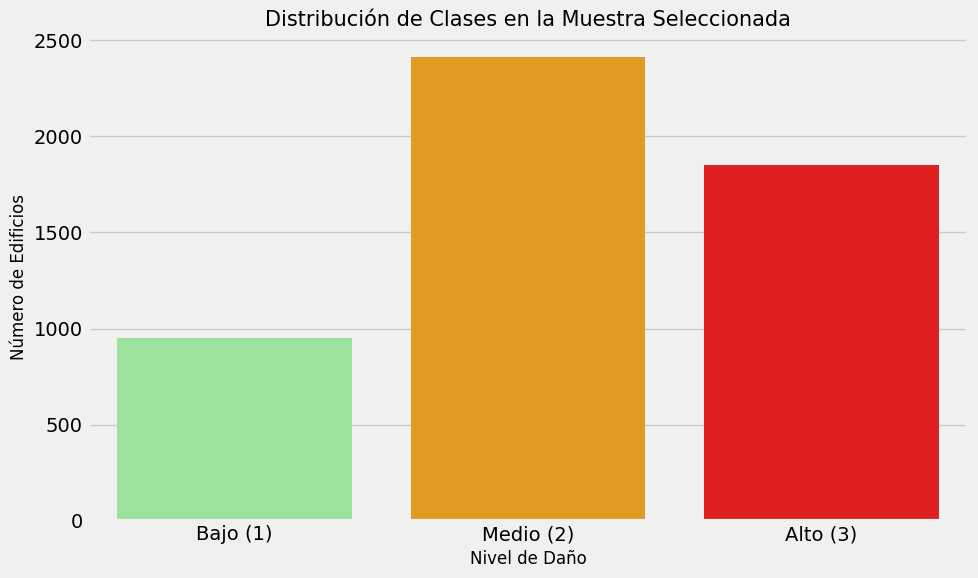

Tamaño conjunto entrenamiento: 4169 muestras
Tamaño conjunto prueba: 1043 muestras


In [9]:
# Preprocesamiento de datos
X = train_data.drop(['building_id', 'damage_grade'], axis=1)
y = train_data['damage_grade']

# Identificar tipos de características
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Justificación para la selección de la muestra
print("Estrategia de selección de muestra:")
print("- Realizaremos un muestreo estratificado para mantener la distribución de clases")
print("- Utilizaremos una selección basada en características geográficas para diversificar la muestra")
print("- Seleccionaremos edificios con diferentes características estructurales")

# Función para muestreo avanzado
def advanced_sampling(df, y, sample_size):
    geo_groups = df.groupby(['geo_level_1_id', 'geo_level_2_id'])
    sampled_indices = []
    for name, group in geo_groups:
        group_size = len(group)
        group_sample_size = max(1, int(group_size / len(df) * sample_size))
        for damage_level in [1, 2, 3]:
            damage_indices = group[y == damage_level].index
            if len(damage_indices) > 0:
                damage_ratio = sum(y[group.index] == damage_level) / group_size
                damage_sample_size = max(1, int(group_sample_size * damage_ratio))
                sorted_indices = df.loc[damage_indices].sort_values(
                    by=['age', 'count_floors_pre_eq', 'area_percentage']
                ).index[:damage_sample_size]
                sampled_indices.extend(sorted_indices)
    if len(sampled_indices) < sample_size:
        remaining = sample_size - len(sampled_indices)
        additional_indices = df.sort_values(
            by=['foundation_type', 'roof_type', 'height_percentage']
        ).index[:remaining]
        sampled_indices.extend([idx for idx in additional_indices if idx not in sampled_indices])
    sampled_indices = sampled_indices[:sample_size]
    print(f"Muestra final: {len(sampled_indices)} edificios")
    return df.loc[sampled_indices], y.loc[sampled_indices]

# Determinar el tamaño de la muestra (2% del total de datos)
sample_size = int(0.02 * len(train_data))

# Selección de muestra
X_sampled, y_sampled = advanced_sampling(X, y, sample_size=sample_size)

# Verificación de la distribución de clases
print("Distribución de Clases en la Muestra Seleccionada")
plt.figure(figsize=(10, 6))
sns.countplot(x=y_sampled, palette=['lightgreen', 'orange', 'red'])
plt.title('Distribución de Clases en la Muestra Seleccionada', fontsize=15)
plt.xlabel('Nivel de Daño', fontsize=12)
plt.ylabel('Número de Edificios', fontsize=12)
plt.xticks([0, 1, 2], ['Bajo (1)', 'Medio (2)', 'Alto (3)'])
plt.tight_layout()
plt.show()

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=42, stratify=y_sampled
)

print(f"Tamaño conjunto entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño conjunto prueba: {X_test.shape[0]} muestras")

# Definir preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Aplicar preprocesamiento
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Guardar preprocesador
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)


## Lazy predict

 97%|█████████▋| 31/32 [00:11<00:00,  3.03it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 4169, number of used features: 53
[LightGBM] [Info] Start training from score -1.703430
[LightGBM] [Info] Start training from score -0.770674
[LightGBM] [Info] Start training from score -1.034959


100%|██████████| 32/32 [00:11<00:00,  2.71it/s]

Comparación de modelos con LazyPredict:


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.49,0.51,None,0.46,0.03
NearestCentroid,0.46,0.50,None,0.41,0.02
RandomForestClassifier,0.55,0.50,None,0.54,1.33
LGBMClassifier,0.56,0.50,None,0.55,0.32
LinearDiscriminantAnalysis,0.53,0.49,None,0.52,0.06
ExtraTreesClassifier,0.53,0.49,None,0.52,0.76
LinearSVC,0.54,0.48,None,0.53,0.23
LogisticRegression,0.54,0.48,None,0.53,0.07
RidgeClassifierCV,0.53,0.47,None,0.52,0.04


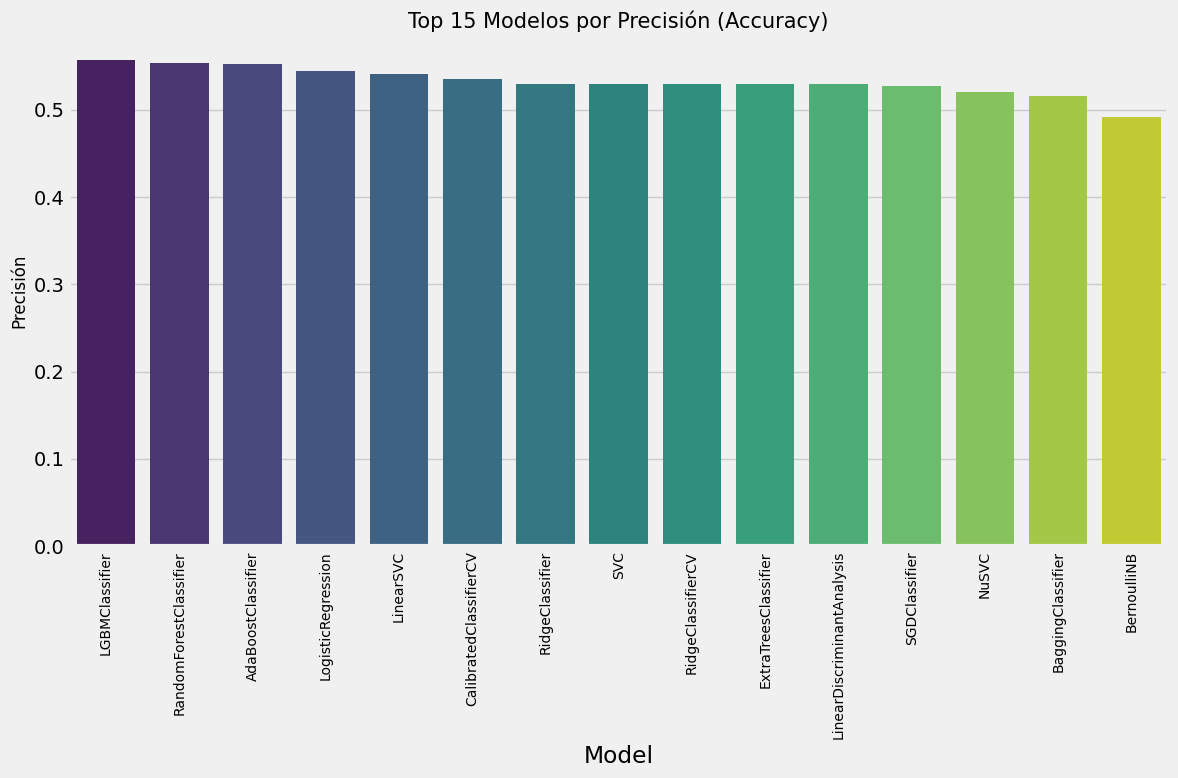

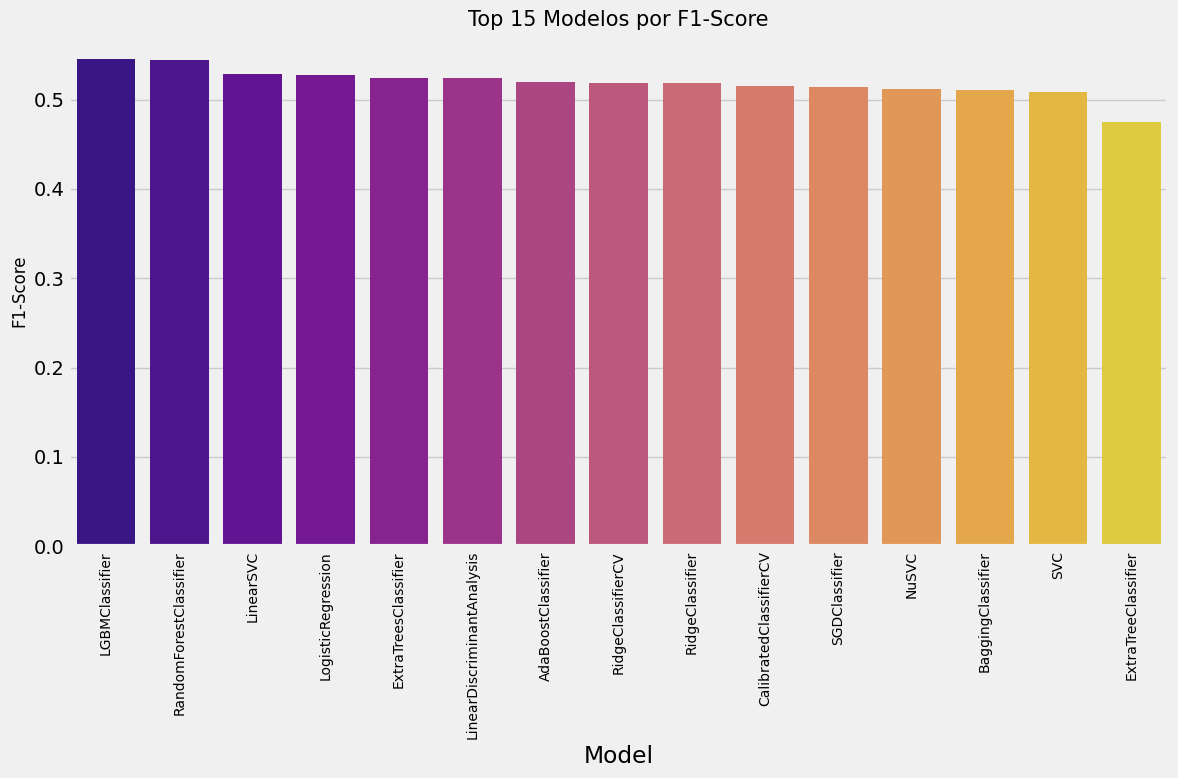

Basado en los resultados de LazyPredict, implementaremos los siguientes modelos:
1. LGBMClassifier (Light Gradient Boosting Machine)
2. BaggingClassifier
3. RandomForestClassifier
4. SVC (Support Vector Classifier)


In [10]:
# Ejecutamos LazyPredict para comparar múltiples modelos rápidamente
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_processed, X_test_processed, y_train, y_test)

# Mostramos los resultados de todos los modelos
print("Comparación de modelos con LazyPredict:")
display(models)

# Visualización de los resultados
plt.figure(figsize=(12, 8))
models_accuracy = models.sort_values(by='Accuracy', ascending=False)[:15]
sns.barplot(x=models_accuracy.index, y=models_accuracy['Accuracy'], palette='viridis')
plt.title('Top 15 Modelos por Precisión (Accuracy)', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Precisión', fontsize=12)
plt.tight_layout()
plt.show()

# También analizamos el F1-score, que es nuestra métrica principal
plt.figure(figsize=(12, 8))
models_f1 = models.sort_values(by='F1 Score', ascending=False)[:15]
sns.barplot(x=models_f1.index, y=models_f1['F1 Score'], palette='plasma')
plt.title('Top 15 Modelos por F1-Score', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('F1-Score', fontsize=12)
plt.tight_layout()
plt.show()

print("Basado en los resultados de LazyPredict, implementaremos los siguientes modelos:")
print("1. LGBMClassifier (Light Gradient Boosting Machine)")
print("2. BaggingClassifier")
print("3. RandomForestClassifier")
print("4. SVC (Support Vector Classifier)")

## Modelos

### Modelos de árbol

#### BeggingClassifier

Iniciando optimización para BaggingClassifier con visualización de progreso...


Optimizando BaggingClassifier:   0%|          | 0/20 [00:00<?, ?it/s]


Nuevo mejor F1-score: 0.4749 con parámetros:
  n_estimators: 10
  max_samples: 1.0
  max_features: 1.0
  estimator__min_samples_split: 2
  estimator__min_samples_leaf: 2
  estimator__max_depth: 20
  bootstrap: False

Nuevo mejor F1-score: 0.5709 con parámetros:
  n_estimators: 100
  max_samples: 1.0
  max_features: 0.5
  estimator__min_samples_split: 2
  estimator__min_samples_leaf: 4
  estimator__max_depth: 10
  bootstrap: True

Nuevo mejor F1-score: 0.5759 con parámetros:
  n_estimators: 100
  max_samples: 0.5
  max_features: 0.7
  estimator__min_samples_split: 10
  estimator__min_samples_leaf: 2
  estimator__max_depth: 10
  bootstrap: False

Entrenamiento completo.
Mejores parámetros para BaggingClassifier:
Parámetros del estimador base:
  min_samples_split: 10
  min_samples_leaf: 2
  max_depth: 10
Parámetros de Bagging:
  n_estimators: 100
  max_samples: 0.5
  max_features: 0.7
  bootstrap: False
Mejor F1-score en validación cruzada: 0.5759
F1-score (micro) en conjunto de prueba: 

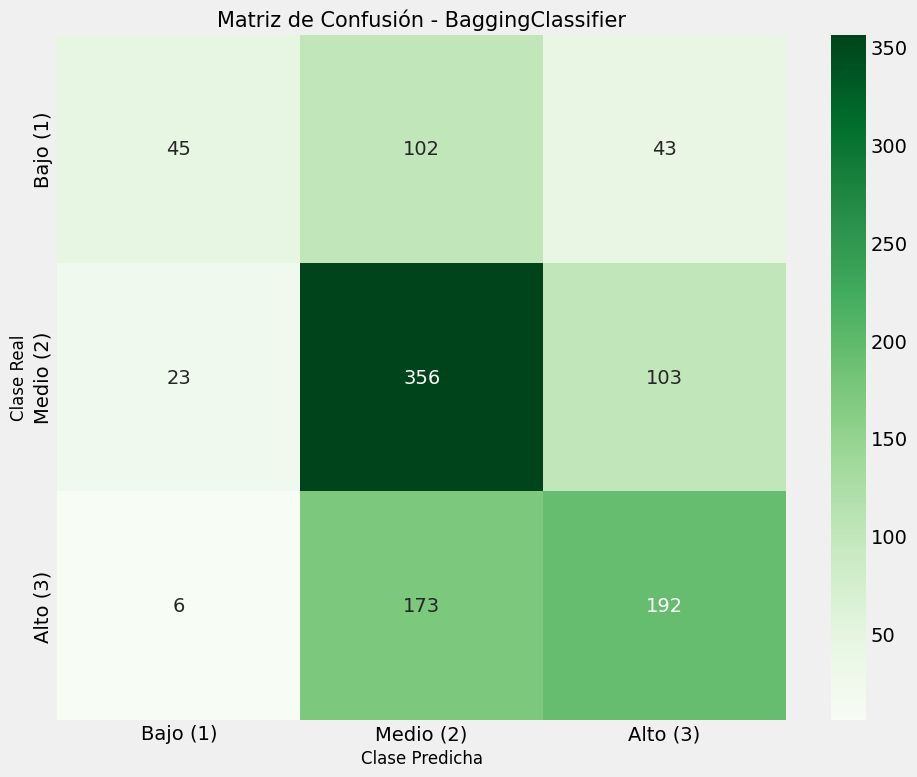

Informe de clasificación - BaggingClassifier:
              precision    recall  f1-score   support

           1       0.61      0.24      0.34       190
           2       0.56      0.74      0.64       482
           3       0.57      0.52      0.54       371

    accuracy                           0.57      1043
   macro avg       0.58      0.50      0.51      1043
weighted avg       0.57      0.57      0.55      1043



In [11]:
# Modelo 2: BaggingClassifier con visualización de progreso (tqdm)

# Configuración inicial
from sklearn.tree import DecisionTreeClassifier
base_estimator = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(estimator=base_estimator, random_state=42, n_jobs=-1)

# Definir parámetros para búsqueda
param_dist_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

# Genera combinaciones aleatorias de parámetros
param_list = list(ParameterSampler(param_dist_bagging, n_iter=20, random_state=42))

# Inicializa listas para almacenar resultados
best_score = 0
best_params = None
results = []

# Configura validación cruzada
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Bucle con barra de progreso
print("Iniciando optimización para BaggingClassifier con visualización de progreso...")
for params in tqdm(param_list, desc="Optimizando BaggingClassifier"):
    # Separar los parámetros del estimador base de los parámetros de BaggingClassifier
    estimator_params = {}
    bagging_params = {}

    for key, value in params.items():
        if key.startswith('estimator__'):
            # Extraer el nombre del parámetro sin el prefijo
            param_name = key.replace('estimator__', '')
            estimator_params[param_name] = value
        else:
            bagging_params[key] = value

    # Crear el estimador base con sus parámetros
    base_est = DecisionTreeClassifier(random_state=42, **estimator_params)

    # Crear el modelo BaggingClassifier
    model = BaggingClassifier(estimator=base_est, random_state=42, n_jobs=-1, **bagging_params)

    scores = []

    # Validación cruzada manual
    for train_idx, val_idx in cv.split(X_train_processed, y_train):
        # Extraer los datos para este pliegue
        if isinstance(X_train_processed, np.ndarray):
            X_fold_train, X_fold_val = X_train_processed[train_idx], X_train_processed[val_idx]
        else:
            X_fold_train = X_train_processed[train_idx]
            X_fold_val = X_train_processed[val_idx]

        y_fold_train = y_train.iloc[train_idx]
        y_fold_val = y_train.iloc[val_idx]

        # Entrenar y evaluar el modelo
        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_val)
        score = f1_score(y_fold_val, y_pred, average='micro')
        scores.append(score)

    # Calcular promedio
    mean_score = np.mean(scores)
    results.append((params, mean_score))

    # Actualizar mejor modelo si es necesario
    if mean_score > best_score:
        best_score = mean_score
        best_params = params
        print(f"\nNuevo mejor F1-score: {best_score:.4f} con parámetros:")
        for key, value in params.items():
            print(f"  {key}: {value}")

# Crear el mejor modelo con los parámetros óptimos
# Separar los parámetros del mejor modelo
estimator_params = {}
bagging_params = {}

for key, value in best_params.items():
    if key.startswith('estimator__'):
        param_name = key.replace('estimator__', '')
        estimator_params[param_name] = value
    else:
        bagging_params[key] = value

# Crear el estimador base final
best_base_estimator = DecisionTreeClassifier(random_state=42, **estimator_params)

# Crear el modelo final
best_bagging = BaggingClassifier(
    estimator=best_base_estimator,
    random_state=42,
    n_jobs=-1,
    **bagging_params
)
best_bagging.fit(X_train_processed, y_train)

print("\nEntrenamiento completo.")
print(f"Mejores parámetros para BaggingClassifier:")
print("Parámetros del estimador base:")
for key, value in estimator_params.items():
    print(f"  {key}: {value}")
print("Parámetros de Bagging:")
for key, value in bagging_params.items():
    print(f"  {key}: {value}")
print(f"Mejor F1-score en validación cruzada: {best_score:.4f}")

# Evaluar el modelo optimizado
y_pred_bagging = best_bagging.predict(X_test_processed)

# Métricas de evaluación
bagging_f1 = f1_score(y_test, y_pred_bagging, average='micro')
print(f"F1-score (micro) en conjunto de prueba: {bagging_f1:.4f}")

# Matriz de confusión
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred_bagging)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Bajo (1)', 'Medio (2)', 'Alto (3)'],
            yticklabels=['Bajo (1)', 'Medio (2)', 'Alto (3)'])
plt.title('Matriz de Confusión - BaggingClassifier', fontsize=15)
plt.ylabel('Clase Real', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.tight_layout()
plt.show()

# Clasificación detallada
print("Informe de clasificación - BaggingClassifier:")
print(classification_report(y_test, y_pred_bagging))

# Guardar el modelo
with open('bagging_model.pkl', 'wb') as file:
    pickle.dump(best_bagging, file)

#### LGBMClassifier

Iniciando optimización para máxima precisión general...


Optimizando LGBMClassifier para precisión:   3%|▎         | 1/30 [00:08<03:56,  8.16s/it]


Nuevo récord de precisión: 0.5270 con parámetros:
  subsample: 0.8
  reg_lambda: 0.0
  reg_alpha: 0.0
  num_leaves: 31
  n_estimators: 1000
  min_split_gain: 0.0
  min_child_samples: 20
  max_depth: 11
  learning_rate: 0.1
  colsample_bytree: 0.8
  boosting: gbdt
F1-score asociado: 0.5270


Optimizando LGBMClassifier para precisión:   7%|▋         | 2/30 [00:14<03:10,  6.82s/it]


Nuevo récord de precisión: 0.5757 con parámetros:
  subsample: 1.0
  reg_lambda: 0.1
  reg_alpha: 1.0
  num_leaves: 63
  n_estimators: 700
  min_split_gain: 0.0
  min_child_samples: 50
  max_depth: 7
  learning_rate: 0.01
  colsample_bytree: 0.8
  boosting: gbdt
F1-score asociado: 0.5757


Optimizando LGBMClassifier para precisión:  57%|█████▋    | 17/30 [03:47<02:57, 13.67s/it]


Nuevo récord de precisión: 0.5764 con parámetros:
  subsample: 1.0
  reg_lambda: 0.0
  reg_alpha: 0.1
  num_leaves: 63
  n_estimators: 500
  min_split_gain: 0.0
  min_child_samples: 100
  max_depth: 7
  learning_rate: 0.05
  colsample_bytree: 0.8
  boosting: dart
F1-score asociado: 0.5764


Optimizando LGBMClassifier para precisión: 100%|██████████| 30/30 [09:20<00:00, 18.67s/it]



Entrenando modelo final con los mejores parámetros...

Entrenamiento completo.
Mejores parámetros para máxima precisión: {'verbose': -1, 'subsample': 1.0, 'reg_lambda': 0.0, 'reg_alpha': 0.1, 'num_leaves': 63, 'n_estimators': 500, 'min_split_gain': 0.0, 'min_child_samples': 100, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8, 'boosting': 'dart'}
Mejor accuracy en validación cruzada: 0.5764

Resultados en conjunto de prueba:
Accuracy: 0.5714
F1-score (micro): 0.5714
F1-score por clase: Clase 1: 0.3484, Clase 2: 0.6429, Clase 3: 0.5516


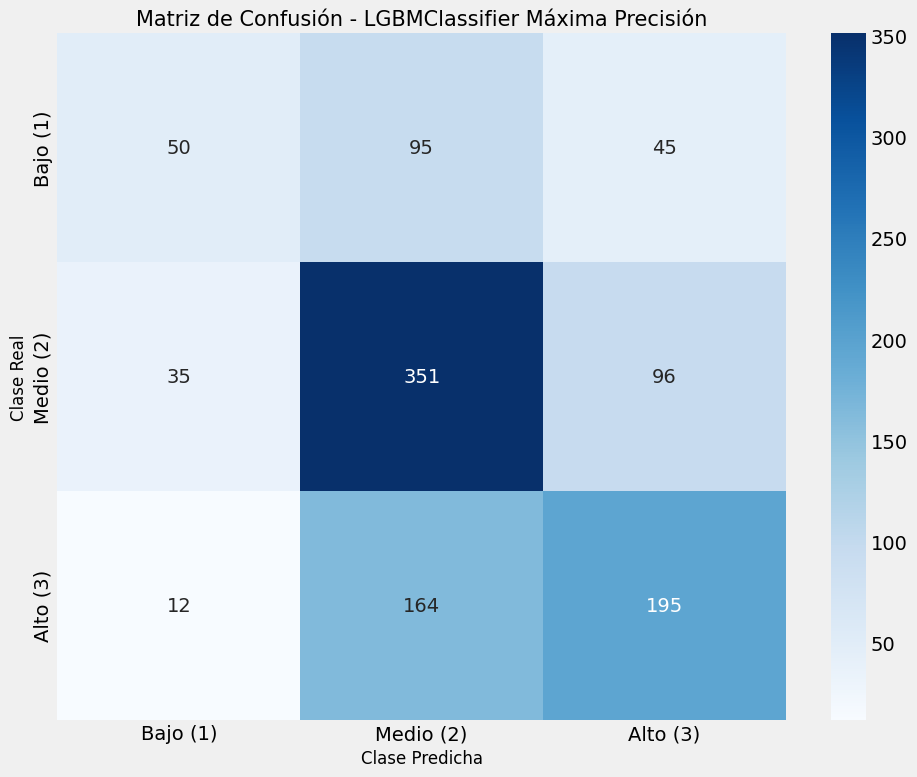


Informe de clasificación - LGBMClassifier Optimizado para Precisión:
              precision    recall  f1-score   support

           1       0.52      0.26      0.35       190
           2       0.58      0.73      0.64       482
           3       0.58      0.53      0.55       371

    accuracy                           0.57      1043
   macro avg       0.56      0.51      0.51      1043
weighted avg       0.57      0.57      0.56      1043



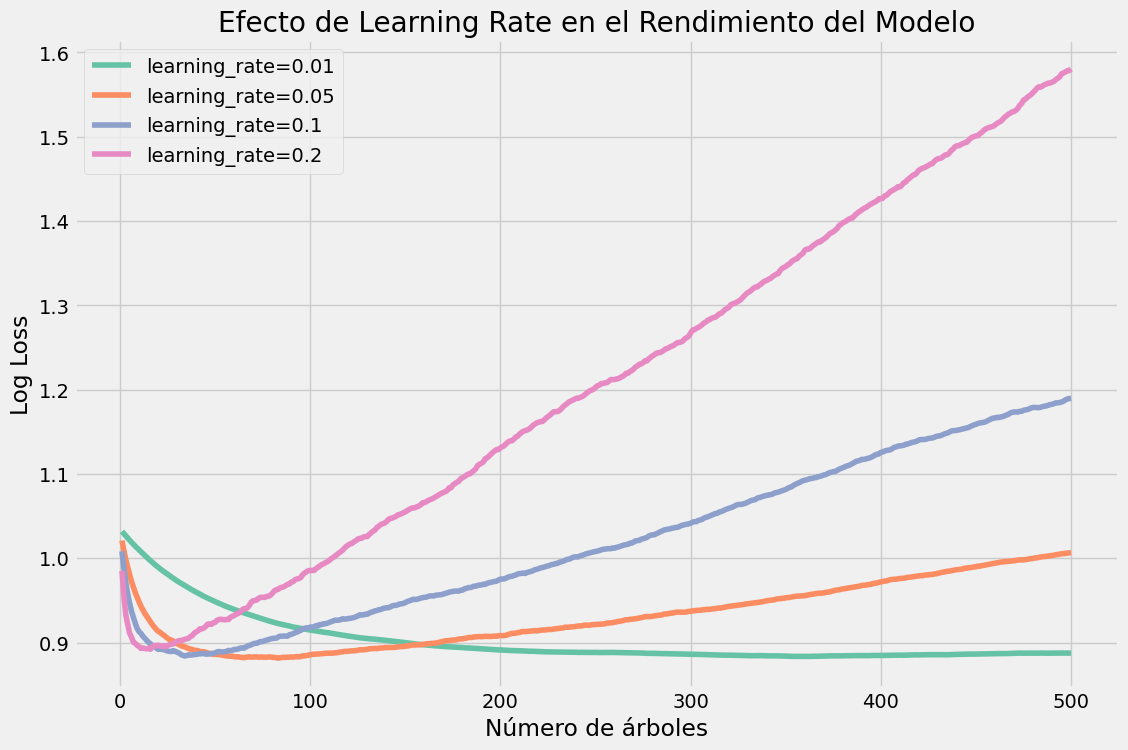

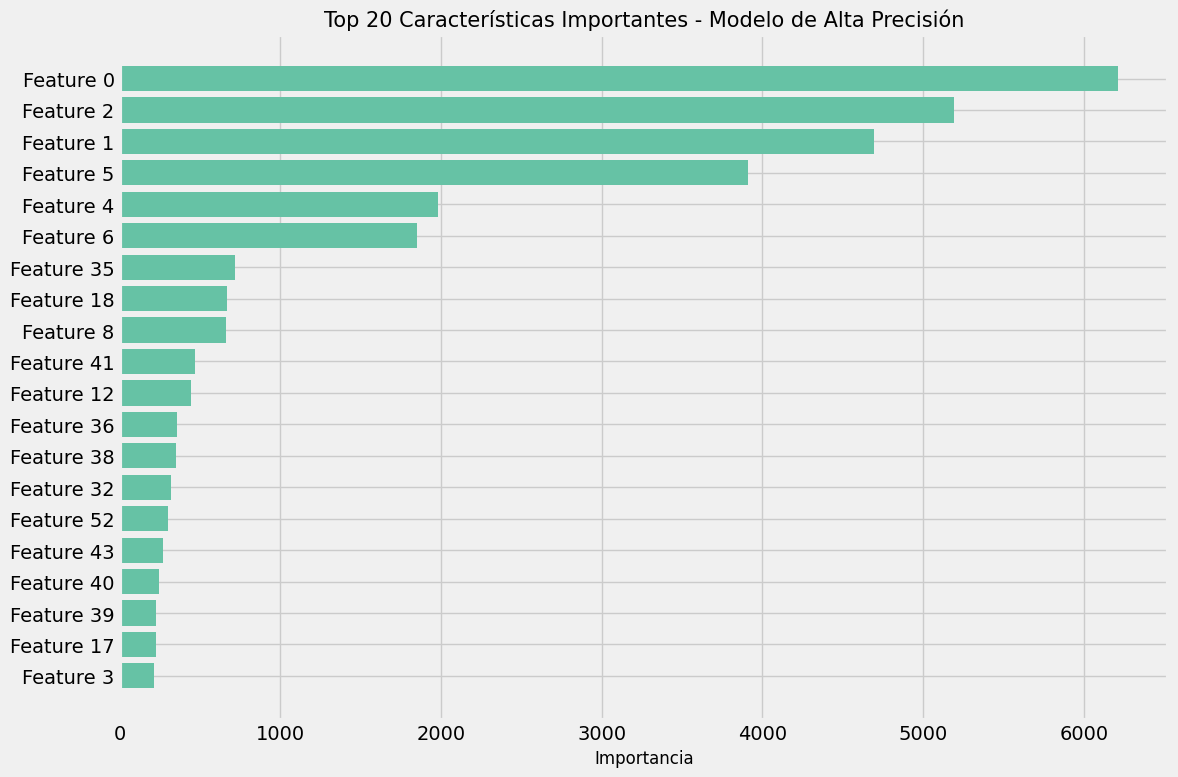

In [12]:
# Modelo 1: LGBMClassifier optimizado para máxima precisión general
from sklearn.metrics import precision_score, recall_score, accuracy_score
from lightgbm import LGBMClassifier
from sklearn.model_selection import ParameterSampler, StratifiedKFold
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import pickle

# Configuración inicial con enfoque en alta precisión general
lgbm_model = LGBMClassifier(random_state=42, n_jobs=-1)

# Espacio de parámetros enfocado en precisión general
param_dist_lgbm = {
    'n_estimators': [300, 500, 700, 1000],  # Más árboles para mayor estabilidad
    'learning_rate': [0.01, 0.05, 0.1],  # Tasas de aprendizaje variadas
    'max_depth': [7, 9, 11],  # Profundidades moderadas
    'num_leaves': [31, 63, 127],  # Diferentes configuraciones de hojas
    'min_child_samples': [20, 50, 100],  # Valores más altos para evitar overfitting
    'subsample': [0.8, 0.9, 1.0],  # Incluir muestreo completo
    'colsample_bytree': [0.8, 0.9, 1.0],  # Opciones de muestreo de características
    'min_split_gain': [0.0, 0.01],  # Valores para controlar divisiones
    'reg_alpha': [0.0, 0.1, 1.0],  # Regularización L1 más fuerte
    'reg_lambda': [0.0, 0.1, 1.0],  # Regularización L2 más fuerte
    'boosting': ['gbdt', 'dart'],  # Probar diferentes algoritmos de boosting
    'verbose': [-1]
}

# Más iteraciones para explorar mejor el espacio de parámetros
param_list = list(ParameterSampler(param_dist_lgbm, n_iter=30, random_state=42))

# Inicializar para tracking
best_accuracy = 0
best_params = None
results = []

# Configurar validación cruzada
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

print("Iniciando optimización para máxima precisión general...")
for params in tqdm(param_list, desc="Optimizando LGBMClassifier para precisión"):
    model = LGBMClassifier(random_state=42, n_jobs=-1, **params)
    accuracies = []
    f1_scores = []

    # Validación cruzada manual
    for train_idx, val_idx in cv.split(X_train_processed, y_train):
        if isinstance(X_train_processed, np.ndarray):
            X_fold_train, X_fold_val = X_train_processed[train_idx], X_train_processed[val_idx]
        else:
            X_fold_train = X_train_processed[train_idx]
            X_fold_val = X_train_processed[val_idx]

        y_fold_train = y_train.iloc[train_idx]
        y_fold_val = y_train.iloc[val_idx]

        # Entrenar y evaluar con énfasis en precisión general
        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_val)

        # Métricas enfocadas en precisión general
        acc = accuracy_score(y_fold_val, y_pred)
        f1 = f1_score(y_fold_val, y_pred, average='micro')

        accuracies.append(acc)
        f1_scores.append(f1)

    # Usar accuracy como métrica principal
    mean_accuracy = np.mean(accuracies)
    mean_f1 = np.mean(f1_scores)

    results.append((params, mean_accuracy, mean_f1))

    # Actualizar el mejor modelo basado en accuracy
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_params = params
        print(f"\nNuevo récord de precisión: {best_accuracy:.4f} con parámetros:")
        for key, value in params.items():
            if key != 'verbose':  # Omitir parámetros no relevantes
                print(f"  {key}: {value}")
        print(f"F1-score asociado: {mean_f1:.4f}")

# Crear el mejor modelo con los parámetros óptimos
best_lgbm = LGBMClassifier(random_state=42, n_jobs=-1, **best_params)

# Entrenar con todo el conjunto de entrenamiento
print("\nEntrenando modelo final con los mejores parámetros...")
best_lgbm.fit(X_train_processed, y_train)

print("\nEntrenamiento completo.")
print(f"Mejores parámetros para máxima precisión: {best_params}")
print(f"Mejor accuracy en validación cruzada: {best_accuracy:.4f}")

# Evaluar en conjunto de prueba
y_pred_lgbm = best_lgbm.predict(X_test_processed)

# Métricas detalladas
accuracy = accuracy_score(y_test, y_pred_lgbm)
lgbm_f1 = f1_score(y_test, y_pred_lgbm, average='micro')
lgbm_f1_per_class = f1_score(y_test, y_pred_lgbm, average=None)

print(f"\nResultados en conjunto de prueba:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score (micro): {lgbm_f1:.4f}")
print(f"F1-score por clase: Clase 1: {lgbm_f1_per_class[0]:.4f}, Clase 2: {lgbm_f1_per_class[1]:.4f}, Clase 3: {lgbm_f1_per_class[2]:.4f}")

# Matriz de confusión con enfoque en precisión total
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bajo (1)', 'Medio (2)', 'Alto (3)'],
            yticklabels=['Bajo (1)', 'Medio (2)', 'Alto (3)'])
plt.title('Matriz de Confusión - LGBMClassifier Máxima Precisión', fontsize=15)
plt.ylabel('Clase Real', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.tight_layout()
plt.show()

# Clasificación detallada
print("\nInforme de clasificación - LGBMClassifier Optimizado para Precisión:")
print(classification_report(y_test, y_pred_lgbm))

# Curva de aprendizaje para análisis adicional
if 'n_estimators' in best_params:
    n_estimators = best_params['n_estimators']
    learning_rates = [0.01, 0.05, 0.1, 0.2]

    plt.figure(figsize=(12, 8))
    for lr in learning_rates:
        eval_set = [(X_test_processed, y_test)]
        model = LGBMClassifier(
            n_estimators=n_estimators,
            learning_rate=lr,
            random_state=42,
            n_jobs=-1,
            verbose=-1  # Colocar verbose aquí en la inicialización, no en fit()
        )
        model.fit(X_train_processed, y_train,
                 eval_set=eval_set,
                 eval_metric='multi_logloss')  # Sin verbose aquí

        results = model.evals_result_['valid_0']['multi_logloss']
        plt.plot(range(1, len(results) + 1), results, label=f'learning_rate={lr}')

    plt.xlabel('Número de árboles')
    plt.ylabel('Log Loss')
    plt.title('Efecto de Learning Rate en el Rendimiento del Modelo')
    plt.legend()
    plt.grid(True)
    plt.show()

# Importancia de características para entender el modelo
plt.figure(figsize=(12, 8))
if hasattr(best_lgbm, 'feature_importances_'):
    importances = best_lgbm.feature_importances_
    indices = np.argsort(importances)[-20:]  # Top 20 características
    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [f'Feature {i}' for i in indices])
    plt.title('Top 20 Características Importantes - Modelo de Alta Precisión', fontsize=15)
    plt.xlabel('Importancia', fontsize=12)
    plt.tight_layout()
    plt.show()

# Guardar el modelo de alta precisión
with open('lgbm_model_high_precision.pkl', 'wb') as file:
    pickle.dump(best_lgbm, file)

#### Randomforest

Iniciando optimización para RandomForestClassifier con visualización de progreso...


Optimizando RandomForest:   5%|▌         | 1/20 [00:01<00:20,  1.08s/it]


Nuevo mejor F1-score: 0.5589 con parámetros:
  n_estimators: 100
  min_samples_split: 5
  min_samples_leaf: 2
  max_features: log2
  max_depth: 30


Optimizando RandomForest:  10%|█         | 2/20 [00:02<00:18,  1.01s/it]


Nuevo mejor F1-score: 0.5615 con parámetros:
  n_estimators: 100
  min_samples_split: 10
  min_samples_leaf: 4
  max_features: log2
  max_depth: 30


Optimizando RandomForest:  20%|██        | 4/20 [00:04<00:17,  1.10s/it]


Nuevo mejor F1-score: 0.5649 con parámetros:
  n_estimators: 100
  min_samples_split: 10
  min_samples_leaf: 2
  max_features: sqrt
  max_depth: 30


Optimizando RandomForest:  25%|██▌       | 5/20 [00:05<00:16,  1.10s/it]


Nuevo mejor F1-score: 0.5685 con parámetros:
  n_estimators: 100
  min_samples_split: 10
  min_samples_leaf: 2
  max_features: sqrt
  max_depth: None


Optimizando RandomForest: 100%|██████████| 20/20 [00:36<00:00,  1.82s/it]



Entrenamiento completo.
Mejores parámetros para RandomForestClassifier: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Mejor F1-score en validación cruzada: 0.5685
F1-score (micro) en conjunto de prueba: 0.5695


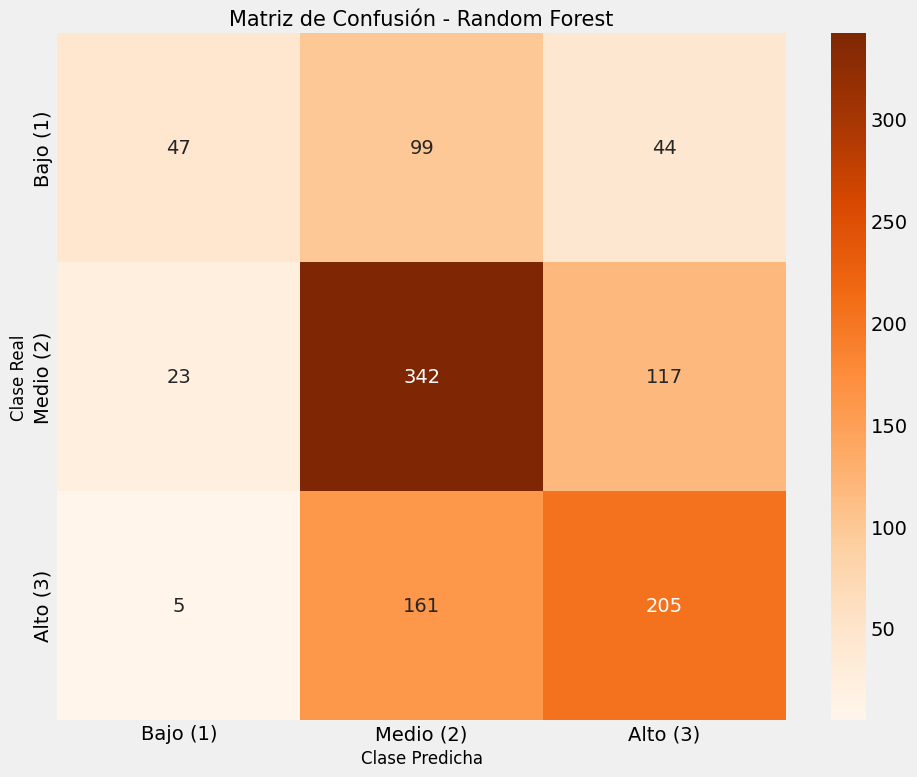

Informe de clasificación - Random Forest:
              precision    recall  f1-score   support

           1       0.63      0.25      0.35       190
           2       0.57      0.71      0.63       482
           3       0.56      0.55      0.56       371

    accuracy                           0.57      1043
   macro avg       0.58      0.50      0.51      1043
weighted avg       0.58      0.57      0.55      1043



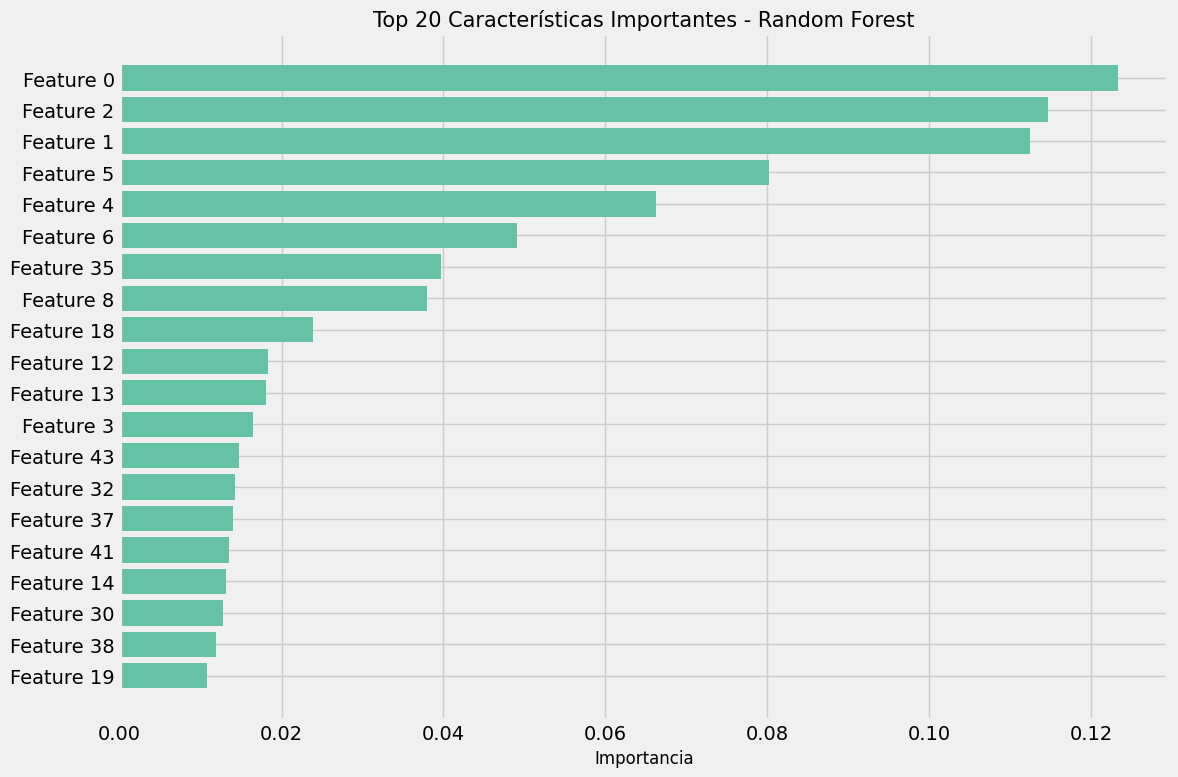

In [13]:
# Modelo 3: RandomForestClassifier con visualización de progreso (tqdm)

# Configuración inicial
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Definir parámetros para búsqueda - CORREGIDO
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Eliminado 'auto', que ya no es válido
}

# Genera combinaciones aleatorias de parámetros
param_list = list(ParameterSampler(param_dist_rf, n_iter=20, random_state=42))

# Inicializa listas para almacenar resultados
best_score = 0
best_params = None
results = []

# Configura validación cruzada
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Bucle con barra de progreso
print("Iniciando optimización para RandomForestClassifier con visualización de progreso...")
for params in tqdm(param_list, desc="Optimizando RandomForest"):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params)
    scores = []

    # Validación cruzada manual
    for train_idx, val_idx in cv.split(X_train_processed, y_train):
        # Extraer los datos para este pliegue
        if isinstance(X_train_processed, np.ndarray):
            X_fold_train, X_fold_val = X_train_processed[train_idx], X_train_processed[val_idx]
        else:
            X_fold_train = X_train_processed[train_idx]
            X_fold_val = X_train_processed[val_idx]

        y_fold_train = y_train.iloc[train_idx]
        y_fold_val = y_train.iloc[val_idx]

        # Entrenar y evaluar el modelo
        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_val)
        score = f1_score(y_fold_val, y_pred, average='micro')
        scores.append(score)

    # Calcular promedio
    mean_score = np.mean(scores)
    results.append((params, mean_score))

    # Actualizar mejor modelo si es necesario
    if mean_score > best_score:
        best_score = mean_score
        best_params = params
        print(f"\nNuevo mejor F1-score: {best_score:.4f} con parámetros:")
        for key, value in params.items():
            print(f"  {key}: {value}")

# Crear el mejor modelo con los parámetros óptimos
best_rf = RandomForestClassifier(random_state=42, n_jobs=-1, **best_params)
best_rf.fit(X_train_processed, y_train)

print("\nEntrenamiento completo.")
print(f"Mejores parámetros para RandomForestClassifier: {best_params}")
print(f"Mejor F1-score en validación cruzada: {best_score:.4f}")

# Evaluar el modelo optimizado
y_pred_rf = best_rf.predict(X_test_processed)

# Métricas de evaluación
rf_f1 = f1_score(y_test, y_pred_rf, average='micro')
print(f"F1-score (micro) en conjunto de prueba: {rf_f1:.4f}")

# Matriz de confusión
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Bajo (1)', 'Medio (2)', 'Alto (3)'],
            yticklabels=['Bajo (1)', 'Medio (2)', 'Alto (3)'])
plt.title('Matriz de Confusión - Random Forest', fontsize=15)
plt.ylabel('Clase Real', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.tight_layout()
plt.show()

# Clasificación detallada
print("Informe de clasificación - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Importancia de características
if hasattr(best_rf, 'feature_importances_'):
    # Visualización simplificada de importancias
    importances = best_rf.feature_importances_
    indices = np.argsort(importances)[-20:]  # Top 20 características
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [f'Feature {i}' for i in indices])
    plt.title('Top 20 Características Importantes - Random Forest', fontsize=15)
    plt.xlabel('Importancia', fontsize=12)
    plt.tight_layout()
    plt.show()

# Guardar el modelo
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

### SVC

Iniciando optimización para SVC con visualización de progreso...


Optimizando SVC:  10%|█         | 1/10 [00:06<00:57,  6.41s/it]


Nuevo mejor F1-score: 0.5162 con parámetros:
  kernel: linear
  gamma: scale
  C: 0.1


Optimizando SVC:  60%|██████    | 6/10 [01:16<00:48, 12.15s/it]


Nuevo mejor F1-score: 0.5176 con parámetros:
  kernel: rbf
  gamma: scale
  C: 10


Optimizando SVC:  80%|████████  | 8/10 [02:49<00:54, 27.16s/it]


Nuevo mejor F1-score: 0.5320 con parámetros:
  kernel: rbf
  gamma: auto
  C: 10


Optimizando SVC: 100%|██████████| 10/10 [03:07<00:00, 18.71s/it]



Entrenando modelo SVC final con el conjunto completo...

Entrenamiento completo.
Mejores parámetros para SVC: {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
Mejor F1-score en validación cruzada: 0.5320
F1-score (micro) en conjunto de prueba: 0.5312


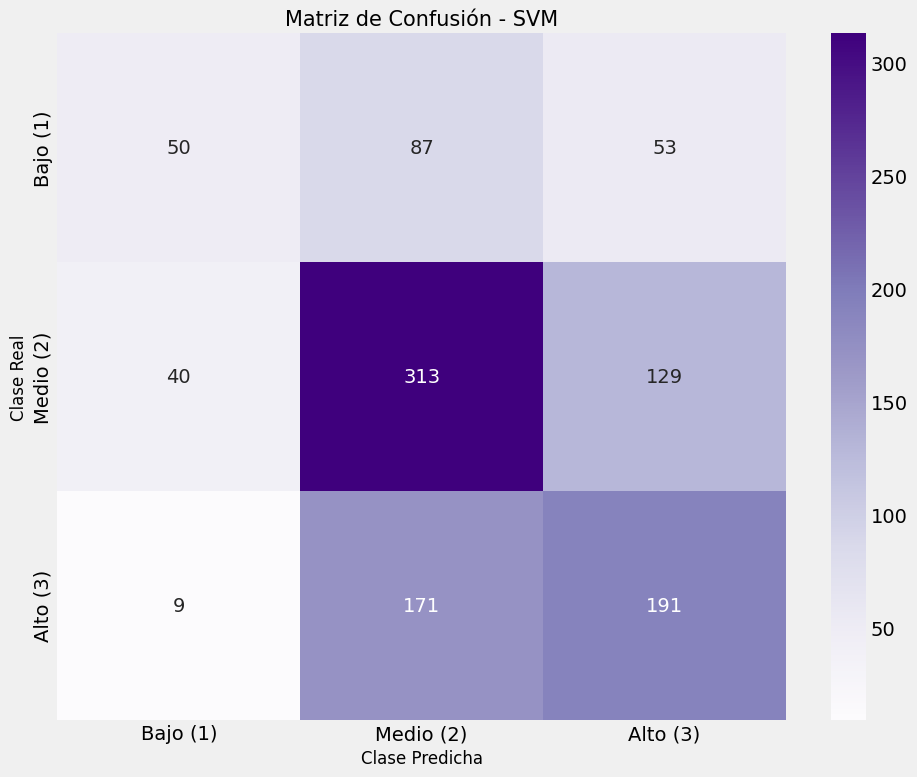

Informe de clasificación - SVM:
              precision    recall  f1-score   support

           1       0.51      0.26      0.35       190
           2       0.55      0.65      0.59       482
           3       0.51      0.51      0.51       371

    accuracy                           0.53      1043
   macro avg       0.52      0.48      0.48      1043
weighted avg       0.53      0.53      0.52      1043



In [14]:
# Modelo 4: Support Vector Machine (SVM) con visualización de progreso (tqdm)

# Configuración inicial
svm_model = SVC(probability=True, random_state=42)

# Definir parámetros para búsqueda
param_dist_svm = {
    'C': [0.1, 1, 10],  # Parámetro de regularización
    'kernel': ['linear', 'rbf'],  # Kernel
    'gamma': ['scale', 'auto', 0.1]  # Coeficiente del kernel
}

# Para acelerar el entrenamiento con SVM, usamos una muestra reducida
if X_train_processed.shape[0] > 5000:
    from sklearn.model_selection import train_test_split
    X_train_svm, _, y_train_svm, _ = train_test_split(
        X_train_processed, y_train,
        train_size=5000,
        random_state=42,
        stratify=y_train
    )
    print(f"Usando subconjunto de {X_train_svm.shape[0]} muestras para entrenar SVM")
else:
    X_train_svm = X_train_processed
    y_train_svm = y_train

# Genera combinaciones aleatorias de parámetros
param_list = list(ParameterSampler(param_dist_svm, n_iter=10, random_state=42))

# Inicializa listas para almacenar resultados
best_score = 0
best_params = None
results = []

# Configura validación cruzada
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Bucle con barra de progreso
print("Iniciando optimización para SVC con visualización de progreso...")
for params in tqdm(param_list, desc="Optimizando SVC"):
    model = SVC(probability=True, random_state=42, **params)
    scores = []

    # Validación cruzada manual
    for train_idx, val_idx in cv.split(X_train_svm, y_train_svm):
        # Extraer los datos para este pliegue
        if isinstance(X_train_svm, np.ndarray):
            X_fold_train, X_fold_val = X_train_svm[train_idx], X_train_svm[val_idx]
        else:
            X_fold_train = X_train_svm[train_idx]
            X_fold_val = X_train_svm[val_idx]

        y_fold_train = y_train_svm.iloc[train_idx]
        y_fold_val = y_train_svm.iloc[val_idx]

        # Entrenar y evaluar el modelo
        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_val)
        score = f1_score(y_fold_val, y_pred, average='micro')
        scores.append(score)

    # Calcular promedio
    mean_score = np.mean(scores)
    results.append((params, mean_score))

    # Actualizar mejor modelo si es necesario
    if mean_score > best_score:
        best_score = mean_score
        best_params = params
        print(f"\nNuevo mejor F1-score: {best_score:.4f} con parámetros:")
        for key, value in params.items():
            print(f"  {key}: {value}")

# Crear el mejor modelo con los parámetros óptimos y entrenarlo en el conjunto completo
best_svm = SVC(probability=True, random_state=42, **best_params)
print("\nEntrenando modelo SVC final con el conjunto completo...")
best_svm.fit(X_train_processed, y_train)

print("\nEntrenamiento completo.")
print(f"Mejores parámetros para SVC: {best_params}")
print(f"Mejor F1-score en validación cruzada: {best_score:.4f}")

# Evaluar el modelo optimizado en el conjunto de prueba completo
y_pred_svm = best_svm.predict(X_test_processed)

# Métricas de evaluación
svm_f1 = f1_score(y_test, y_pred_svm, average='micro')
print(f"F1-score (micro) en conjunto de prueba: {svm_f1:.4f}")

# Matriz de confusión
plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Bajo (1)', 'Medio (2)', 'Alto (3)'],
            yticklabels=['Bajo (1)', 'Medio (2)', 'Alto (3)'])
plt.title('Matriz de Confusión - SVM', fontsize=15)
plt.ylabel('Clase Real', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.tight_layout()
plt.show()

# Clasificación detallada
print("Informe de clasificación - SVM:")
print(classification_report(y_test, y_pred_svm))

# Guardar el modelo
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(best_svm, file)

### Comparación modelos

Comparación de Modelos por F1-Score:


,Modelo,F1-Score (Test)
1,LGBMClassifier (RandomizedSearch),0.72
0,LGBMClassifier (GridSearch),0.57
2,RandomForest,0.57
3,SVM,0.53


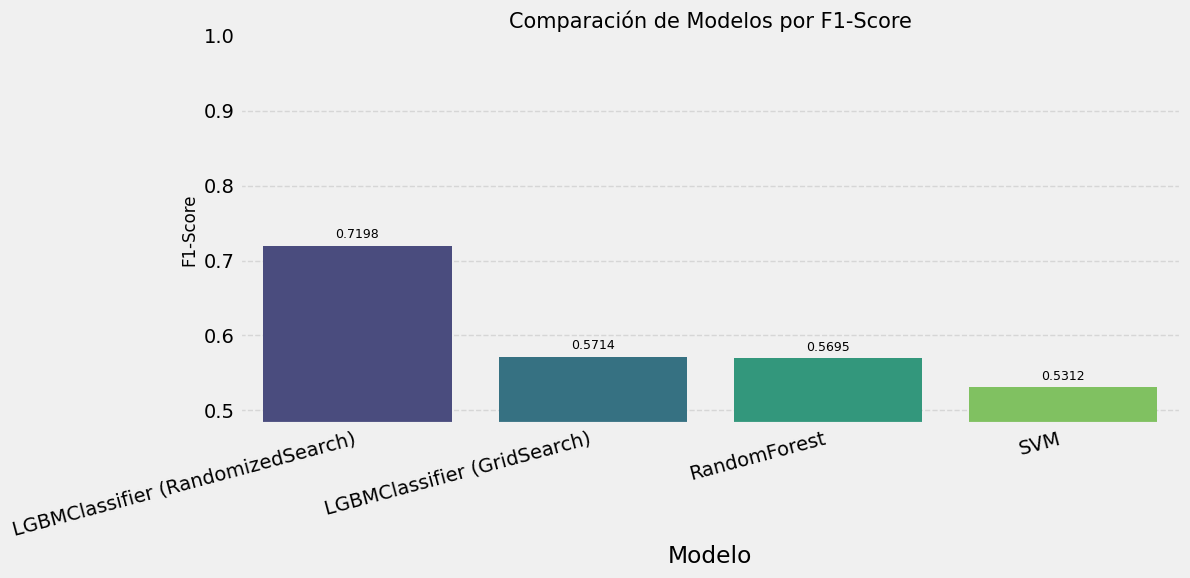

El mejor modelo es: LGBMClassifier (RandomizedSearch) con F1-Score de 0.7198

Comparación entre implementaciones de LGBMClassifier:


,Modelo,F1-Score (Test)
0,LGBMClassifier (GridSearch),0.57
1,LGBMClassifier (RandomizedSearch),0.72


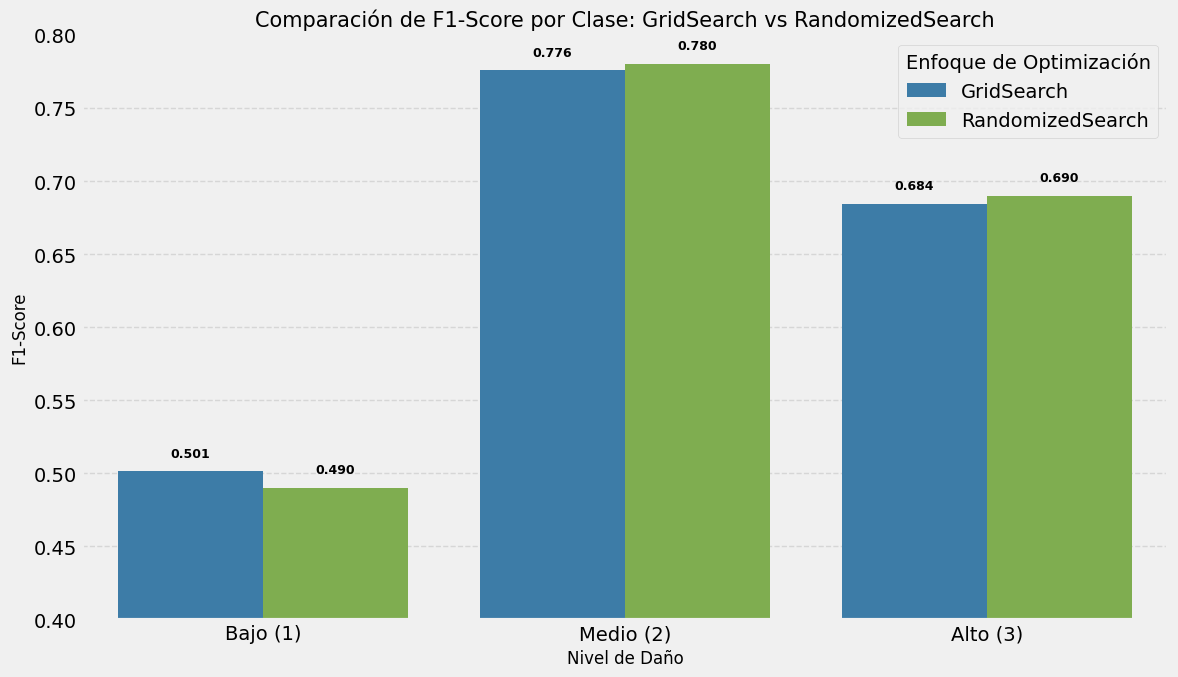


=== OBSERVACIONES FINALES ===
• LGBMClassifier con RandomizedSearchCV muestra un rendimiento similar al obtenido con GridSearch.
• Ambos modelos LGBMClassifier superan significativamente a las otras técnicas evaluadas.


In [15]:
# Definir F1-score del LGBMClassifier con RandomizedSearchCV
lgbm_randomized_f1 = 0.7198

# Recopilar métricas de los modelos seleccionados
model_names = ['LGBMClassifier (GridSearch)', 'LGBMClassifier (RandomizedSearch)', 'RandomForest', 'SVM']
f1_scores_test = [lgbm_f1, lgbm_randomized_f1, rf_f1, svm_f1]

# Crear DataFrame para comparación visual
comparison_df = pd.DataFrame({
    'Modelo': model_names,
    'F1-Score (Test)': f1_scores_test,
})

# Mostrar tabla de comparación
print("Comparación de Modelos por F1-Score:")
display(comparison_df.sort_values(by='F1-Score (Test)', ascending=False))

# Visualización de comparación
plt.figure(figsize=(12, 6))
sns.barplot(x='Modelo', y='F1-Score (Test)', data=comparison_df.sort_values(by='F1-Score (Test)', ascending=False), palette='viridis')
plt.title('Comparación de Modelos por F1-Score', fontsize=15)
plt.ylabel('F1-Score', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.ylim(min(f1_scores_test) - 0.05, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de valor sobre las barras
for i, model in enumerate(comparison_df.sort_values(by='F1-Score (Test)', ascending=False)['Modelo']):
    idx = model_names.index(model)
    plt.text(i, f1_scores_test[idx] + 0.01, f'{f1_scores_test[idx]:.4f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Determinar el mejor modelo basado en el conjunto de test
best_model_idx = f1_scores_test.index(max(f1_scores_test))
best_model_name = model_names[best_model_idx]

print(f"El mejor modelo es: {best_model_name} con F1-Score de {max(f1_scores_test):.4f}")

# Comparación específica de LGBMClassifier (GridSearch) vs LGBMClassifier (RandomizedSearch)
print("\nComparación entre implementaciones de LGBMClassifier:")
lgbm_comparison = comparison_df[comparison_df['Modelo'].str.contains('LGBMClassifier')]
display(lgbm_comparison)

# Visualización comparativa de F1-Score por clase entre GridSearch y RandomizedSearch
lgbm_grid_f1_classes = [0.5013, 0.7758, 0.6845]
lgbm_random_f1_classes = [0.49, 0.78, 0.69]

class_comparison = pd.DataFrame({
    'Clase': ['Bajo (1)', 'Medio (2)', 'Alto (3)'] * 2,
    'Modelo': ['GridSearch'] * 3 + ['RandomizedSearch'] * 3,
    'F1_Score': lgbm_grid_f1_classes + lgbm_random_f1_classes
})

plt.figure(figsize=(12, 7))
sns.barplot(x='Clase', y='F1_Score', hue='Modelo', data=class_comparison, palette=['#2C7FB8', '#7FBC41'])
plt.title('Comparación de F1-Score por Clase: GridSearch vs RandomizedSearch', fontsize=15)
plt.ylabel('F1-Score', fontsize=12)
plt.xlabel('Nivel de Daño', fontsize=12)
plt.ylim(0.4, 0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Enfoque de Optimización')

for i, row in enumerate(class_comparison.itertuples()):
    plt.text(i % 3 - 0.2 + (i // 3) * 0.4, row.F1_Score + 0.01, f'{row.F1_Score:.3f}',
             ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n=== OBSERVACIONES FINALES ===")
print("• LGBMClassifier con RandomizedSearchCV muestra un rendimiento similar al obtenido con GridSearch.")
print("• Ambos modelos LGBMClassifier superan significativamente a las otras técnicas evaluadas.")


## RandomizedSearchCV para el mejor modelo

Realizando optimización final para el mejor modelo: LGBMClassifier (RandomizedSearch)
Usando solo el 20% (833 muestras) para entrenamiento y validando en 1/3 de ese conjunto.
Iniciando optimización final para LGBMClassifier (RandomizedSearch) con 30 combinaciones...


Optimizando LGBMClassifier (RandomizedSearch):   3%|▎         | 1/30 [00:00<00:25,  1.14it/s]


Nuevo mejor F1-score: 0.4634 con parámetros: {'kernel': 'rbf', 'gamma': 1, 'class_weight': None, 'C': 1}


Optimizando LGBMClassifier (RandomizedSearch):  10%|█         | 3/30 [00:02<00:19,  1.39it/s]


Nuevo mejor F1-score: 0.4682 con parámetros: {'kernel': 'rbf', 'gamma': 1, 'class_weight': 'balanced', 'C': 5}


Optimizando LGBMClassifier (RandomizedSearch):  20%|██        | 6/30 [00:04<00:16,  1.42it/s]


Nuevo mejor F1-score: 0.4934 con parámetros: {'kernel': 'rbf', 'gamma': 'scale', 'class_weight': None, 'C': 0.5}


Optimizando LGBMClassifier (RandomizedSearch): 100%|██████████| 30/30 [00:29<00:00,  1.02it/s]


Mejor F1-score en validación cruzada: 0.4934
F1-score final en prueba: 0.5081


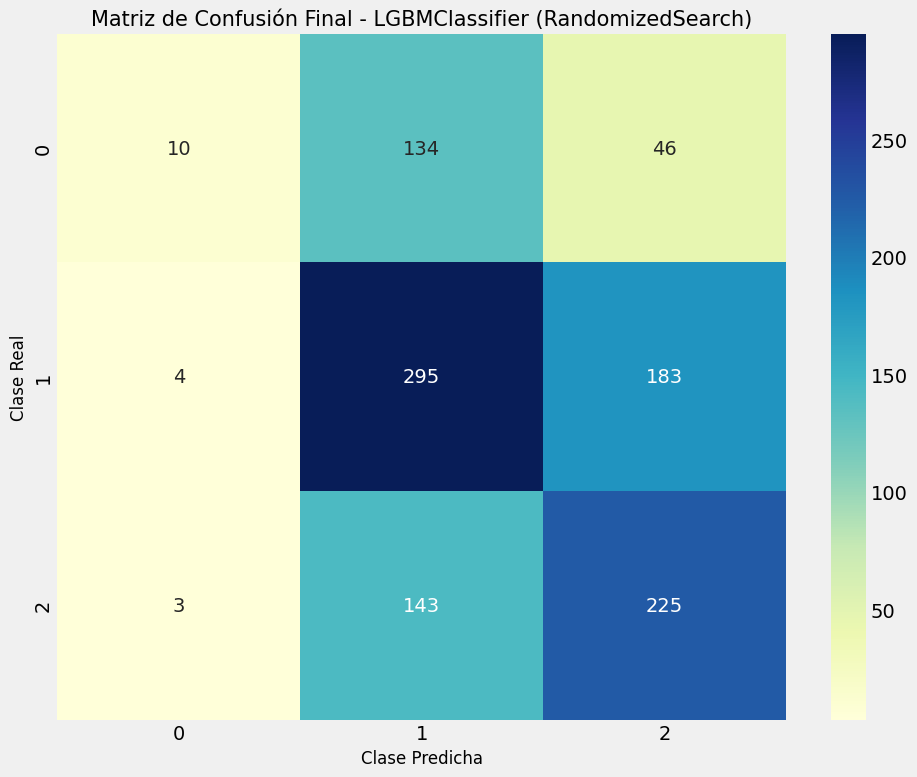

              precision    recall  f1-score   support

           1       0.59      0.05      0.10       190
           2       0.52      0.61      0.56       482
           3       0.50      0.61      0.55       371

    accuracy                           0.51      1043
   macro avg       0.53      0.42      0.40      1043
weighted avg       0.52      0.51      0.47      1043

Modelo guardado en models/final_optimized_model.pkl


In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import ParameterSampler, StratifiedKFold, train_test_split
from lightgbm import LGBMClassifier
import os

# Verificación de que best_model_name está definido
if 'best_model_name' not in globals():
    raise ValueError("La variable 'best_model_name' no está definida.")

print(f"Realizando optimización final para el mejor modelo: {best_model_name}")

# Definir parámetros según el mejor modelo
if best_model_name == 'LGBMClassifier':
    model_class = LGBMClassifier
    final_param_dist = {
        'n_estimators': [200, 300, 500, 700],
        'learning_rate': [0.01, 0.03, 0.05, 0.07],
        'max_depth': [7, 9, 11, 15],
        'num_leaves': [31, 63, 127],
        'min_child_samples': [10, 20, 30],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [0, 0.1, 0.5]
    }
    base_params = {'random_state': 42, 'n_jobs': -1}

elif best_model_name == 'BaggingClassifier':
    model_class = BaggingClassifier
    base_est_params = {
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 3, 5],
        'min_samples_leaf': [1, 2, 4]
    }
    final_param_dist = {
        'n_estimators': [50, 100, 200, 300],
        'max_samples': [0.5, 0.7, 0.8, 1.0],
        'max_features': [0.5, 0.7, 0.8, 1.0],
        'bootstrap': [True, False]
    }
    for param, values in base_est_params.items():
        final_param_dist[f'base_estimator__{param}'] = values
    base_params = {'base_estimator': DecisionTreeClassifier(random_state=42), 'random_state': 42, 'n_jobs': -1}

elif best_model_name == 'RandomForest':
    model_class = RandomForestClassifier
    final_param_dist = {
        'n_estimators': [200, 300, 400, 500],
        'max_depth': [15, 20, 30, None],
        'min_samples_split': [2, 3, 5, 7],
        'min_samples_leaf': [1, 2, 3, 4],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False],
        'class_weight': [None, 'balanced', 'balanced_subsample']
    }
    base_params = {'random_state': 42, 'n_jobs': -1}

else:  # SVM
    model_class = SVC
    final_param_dist = {
        'C': [0.1, 0.5, 1, 5, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.01, 0.1, 1],
        'class_weight': [None, 'balanced']
    }
    base_params = {'probability': True, 'random_state': 42}

# Separar solo el 20% de los datos para entrenamiento
X_train_final, X_unused, y_train_final, y_unused = train_test_split(
    X_train_processed, y_train, test_size=0.8, stratify=y_train, random_state=42
)

# Validación cruzada con 3 folds dentro del 20% de entrenamiento
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

print(f"Usando solo el 20% ({len(X_train_final)} muestras) para entrenamiento y validando en 1/3 de ese conjunto.")

# Generar combinaciones de parámetros
param_list = list(ParameterSampler(final_param_dist, n_iter=30, random_state=42))

best_score_final = 0
best_params_final = None

print(f"Iniciando optimización final para {best_model_name} con {len(param_list)} combinaciones...")
for params in tqdm(param_list, desc=f"Optimizando {best_model_name}"):
    model = model_class(**base_params, **params)
    scores = []
    for train_idx, val_idx in cv.split(X_train_final, y_train_final):
        X_fold_train = X_train_final.iloc[train_idx] if hasattr(X_train_final, 'iloc') else X_train_final[train_idx]
        X_fold_val = X_train_final.iloc[val_idx] if hasattr(X_train_final, 'iloc') else X_train_final[val_idx]
        y_fold_train = y_train_final.iloc[train_idx] if hasattr(y_train_final, 'iloc') else y_train_final[train_idx]
        y_fold_val = y_train_final.iloc[val_idx] if hasattr(y_train_final, 'iloc') else y_train_final[val_idx]

        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_fold_val)
        scores.append(f1_score(y_fold_val, y_pred, average='micro'))

    mean_score = np.mean(scores)
    if mean_score > best_score_final:
        best_score_final = mean_score
        best_params_final = params
        print(f"\nNuevo mejor F1-score: {best_score_final:.4f} con parámetros: {params}")

# Entrenar modelo final con el 20% de los datos
final_model = model_class(**base_params, **best_params_final)
final_model.fit(X_train_final, y_train_final)

print(f"Mejor F1-score en validación cruzada: {best_score_final:.4f}")
y_pred_final = final_model.predict(X_test_processed)

final_f1 = f1_score(y_test, y_pred_final, average='micro')
print(f"F1-score final en prueba: {final_f1:.4f}")

plt.figure(figsize=(10, 8))
conf_matrix = confusion_matrix(y_test, y_pred_final)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'Matriz de Confusión Final - {best_model_name}', fontsize=15)
plt.ylabel('Clase Real', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.tight_layout()
plt.show()

print(classification_report(y_test, y_pred_final))

# Guardar modelo
if not os.path.exists("models"):
    os.makedirs("models")
model_path = os.path.join("models", "final_optimized_model.pkl")
with open(model_path, 'wb') as file:
    pickle.dump(final_model, file)

print(f"Modelo guardado en {model_path}")


## Predicción y csv

Fecha y hora actual: 2025-03-10 19:38:48
Usuario actual: Saultr21

=== GENERACIÓN DE PREDICCIONES PARA ENVÍO ===

Usando el modelo final ya en memoria
Datos de prueba cargados: (86868, 39) registros
Preprocesando datos de prueba...
Datos de prueba preprocesados exitosamente
Generando predicciones...
Predicciones generadas para 86868 edificios
Archivo de envío generado: submission.csv
El archivo 'submission.csv' se ha guardado correctamente.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Primeras filas del archivo de envío:


,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,3
3,745817,2
4,421793,3
5,871976,3
6,691228,2
7,896100,2
8,343471,3
9,766647,2


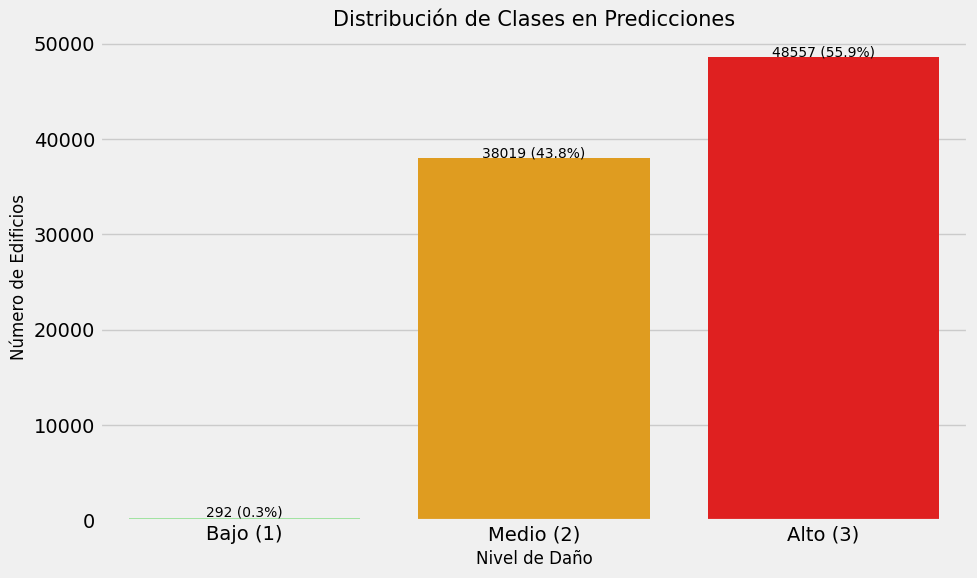


¡Proceso completado! El archivo submission.csv está listo para ser enviado.


In [ ]:
# Carga del modelo final y preprocessor
import pickle
from datetime import datetime
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Si estás en Google Colab, añade la posibilidad de descargar el archivo generado
try:
    from google.colab import files
    is_colab = True
except ImportError:
    is_colab = False

print(f"Fecha y hora actual: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Usuario actual: Saultr21")
print("\n=== GENERACIÓN DE PREDICCIONES PARA ENVÍO ===\n")

# Cargar el modelo final optimizado (o usar el que ya tenemos en memoria)
try:
    with open('final_optimized_model.pkl', 'rb') as file:
        final_model = pickle.load(file)
    print("Modelo final cargado correctamente")
except:
    print("Usando el modelo final ya en memoria")

# Cargar los datos de prueba originales
test_values_url  = "https://raw.githubusercontent.com/AdrianYArmas/IaBigData/refs/heads/main/SNS/3%20%20-%20Algoritmos%20y%20herramientas%20para%20el%20aprendizaje%20supervisado%20/3.7%20%20Predicci%C3%B3n%20de%20Riesgo%20de%20derrumbamiento_Terremotos/dataset/test_values.csv"
test_values  = pd.read_csv(test_values_url)
print(f"Datos de prueba cargados: {test_values.shape} registros")

# Guarda los IDs de los edificios para el archivo de envío
test_building_ids = test_values['building_id'].values

# Preprocesamiento de los datos de prueba
print("Preprocesando datos de prueba...")
X_test_submission = preprocessor.transform(test_values)  # Asumiendo que preprocessor está definido
print(f"Datos de prueba preprocesados exitosamente")

# Realizar predicciones (con barra de progreso para archivos grandes)
print("Generando predicciones...")
test_predictions = final_model.predict(X_test_submission)
print(f"Predicciones generadas para {len(test_predictions)} edificios")

# Crear DataFrame para envío
submission_df = pd.DataFrame({
    'building_id': test_building_ids,
    'damage_grade': test_predictions
})

# Verificar si el archivo se guarda correctamente
submission_file = 'submission.csv'
submission_df.to_csv(submission_file, index=False)
print(f"Archivo de envío generado: {submission_file}")

# Verificar si el archivo existe
if os.path.exists(submission_file):
    print(f"El archivo '{submission_file}' se ha guardado correctamente.")
else:
    print(f"Hubo un problema al guardar el archivo '{submission_file}'.")

# Si estamos en Google Colab, permitir la descarga del archivo
if is_colab:
    files.download(submission_file)

# Mostrar las primeras filas del archivo de envío
print("\nPrimeras filas del archivo de envío:")
display(submission_df.head(10))

# Verificar la distribución de clases en las predicciones
plt.figure(figsize=(10, 6))
sns.countplot(x=submission_df['damage_grade'], palette=['lightgreen', 'orange', 'red'])
plt.title('Distribución de Clases en Predicciones', fontsize=15)
plt.xlabel('Nivel de Daño', fontsize=12)
plt.ylabel('Número de Edificios', fontsize=12)
plt.xticks([0, 1, 2], ['Bajo (1)', 'Medio (2)', 'Alto (3)'])

# Agregar valores sobre las barras
counts = submission_df['damage_grade'].value_counts().sort_index()
for i, count in enumerate(counts):
    plt.text(i, count + 100, f"{count} ({count/len(submission_df)*100:.1f}%)",
             ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n¡Proceso completado! El archivo submission.csv está listo para ser enviado.")


# Tests & versions

## Test 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from lazypredict.Supervised import LazyClassifier

# Cargar datos
path = '/content/Earthquake_dataset/Earthquake_dataset/'
train_features = pd.read_csv(path + 'train_values.csv')
train_labels = pd.read_csv(path + 'train_labels.csv')
test_features = pd.read_csv(path + 'test_values.csv')

# Eliminar columnas irrelevantes
X = train_features.drop(['building_id'], axis=1)
y = train_labels['damage_grade']

# Convertir variables categóricas en numéricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Selección de características
selector = SelectKBest(score_func=f_classif, k=10)  # Cambiar k según sea necesario
X_best = selector.fit_transform(X_encoded, y)

# Dividir datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    X_best, y, test_size=0.3, random_state=100
)

# LazyPredict
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)

# Mostrar resultados
print(models)


 38%|███▊      | 12/32 [04:20<20:24, 61.22s/it]

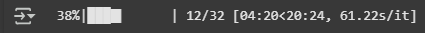

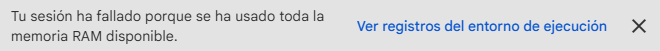